# FITZPATRICK

In [19]:
import platt
import uncertainty
import conformal
import distances
import metrics
import utils

import importlib
importlib.reload(metrics)
importlib.reload(platt)
importlib.reload(uncertainty)
importlib.reload(conformal)
importlib.reload(utils)
importlib.reload(distances)
from utils import first

import collections, itertools, json, os, pathlib, sys

import PIL
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use('bmh')
import torch
print('scipy\t', scipy.__version__)
print('pytorch\t', torch.__version__)
print('pandas\t', pd.__version__)
print('numpy\t', np.__version__)
print('python\t', sys.version)
np.random.seed(0)

scipy	 1.7.3
pytorch	 1.10.2
pandas	 1.4.0
numpy	 1.22.1
python	 3.9.9 (main, Jan 13 2022, 10:56:10) 
[Clang 12.0.0 (clang-1200.0.32.28)]


## Path to label file

In [171]:
label_csv = '/Users/charles.lu/AAAI/data/skin/skin-info.csv'
skin_df = pd.read_csv(label_csv)

## Save figures here

In [207]:
save_dir = pathlib.Path('/Users/charles.lu/AAAI/')
fig_dir = save_dir / 'figures'
fig_dir.mkdir(exist_ok=True)

## Class distriubtion 

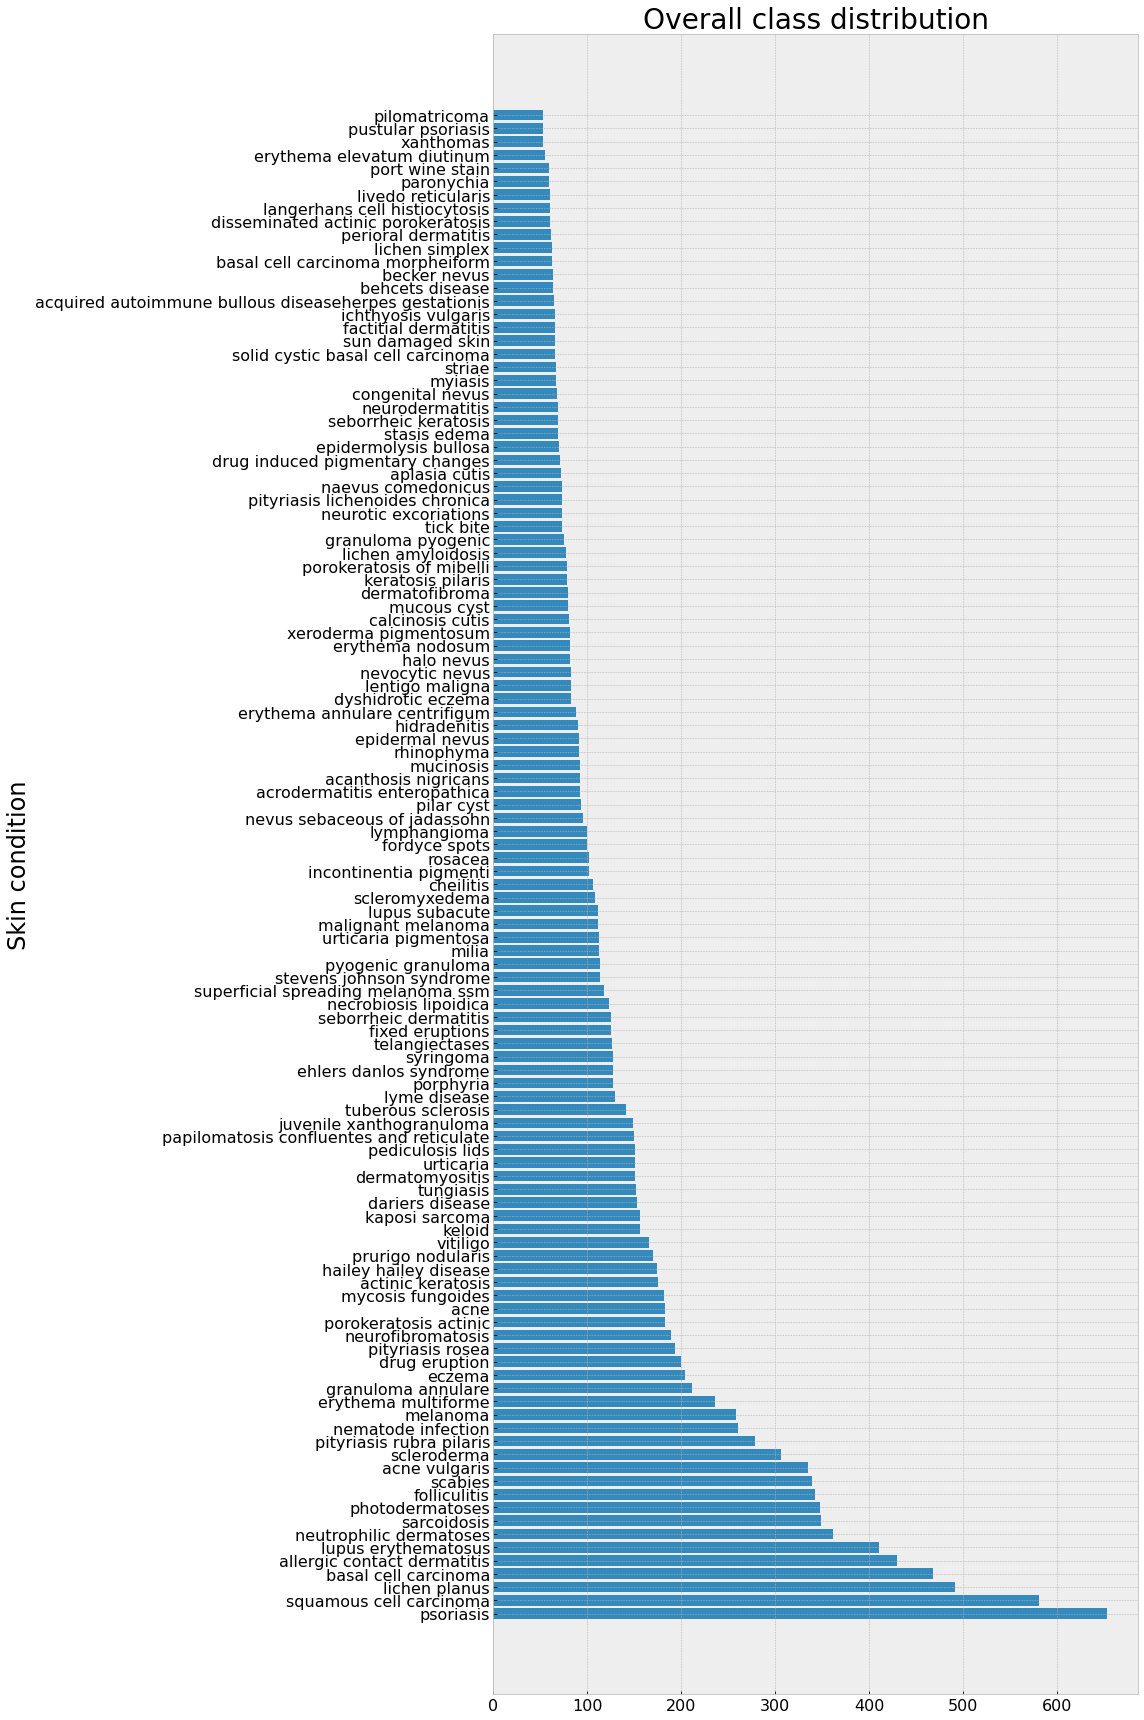

In [208]:
plt.figure(figsize=(16, 24))
plt.title('Overall class distribution', fontsize=28)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Skin condition', fontsize=24)
plt.barh(*list(zip(*skin_df.raw_label.value_counts().items())))
plt.tight_layout()
plt.savefig(fig_dir / 'fitz-class-dist.png')
plt.show()

In [200]:
class_dict_114 = {'acanthosis nigricans': 0, 'acne': 1, 'acne vulgaris': 2, 'acquired autoimmune bullous diseaseherpes gestationis': 3, 'acrodermatitis enteropathica': 4, 'actinic keratosis': 5, 'allergic contact dermatitis': 6, 'aplasia cutis': 7, 'basal cell carcinoma': 8, 'basal cell carcinoma morpheiform': 9, 'becker nevus': 10, 'behcets disease': 11, 'calcinosis cutis': 12, 'cheilitis': 13, 'congenital nevus': 14, 'dariers disease': 15, 'dermatofibroma': 16, 'dermatomyositis': 17, 'disseminated actinic porokeratosis': 18, 'drug eruption': 19, 'drug induced pigmentary changes': 20, 'dyshidrotic eczema': 21, 'eczema': 22, 'ehlers danlos syndrome': 23, 'epidermal nevus': 24, 'epidermolysis bullosa': 25, 'erythema annulare centrifigum': 26, 'erythema elevatum diutinum': 27, 'erythema multiforme': 28, 'erythema nodosum': 29, 'factitial dermatitis': 30, 'fixed eruptions': 31, 'folliculitis': 32, 'fordyce spots': 33, 'granuloma annulare': 34, 'granuloma pyogenic': 35, 'hailey hailey disease': 36, 'halo nevus': 37, 'hidradenitis': 38, 'ichthyosis vulgaris': 39, 'incontinentia pigmenti': 40, 'juvenile xanthogranuloma': 41, 'kaposi sarcoma': 42, 'keloid': 43, 'keratosis pilaris': 44, 'langerhans cell histiocytosis': 45, 'lentigo maligna': 46, 'lichen amyloidosis': 47, 'lichen planus': 48, 'lichen simplex': 49, 'livedo reticularis': 50, 'lupus erythematosus': 51, 'lupus subacute': 52, 'lyme disease': 53, 'lymphangioma': 54, 'malignant melanoma': 55, 'melanoma': 56, 'milia': 57, 'mucinosis': 58, 'mucous cyst': 59, 'mycosis fungoides': 60, 'myiasis': 61, 'naevus comedonicus': 62, 'necrobiosis lipoidica': 63, 'nematode infection': 64, 'neurodermatitis': 65, 'neurofibromatosis': 66, 'neurotic excoriations': 67, 'neutrophilic dermatoses': 68, 'nevocytic nevus': 69, 'nevus sebaceous of jadassohn': 70, 'papilomatosis confluentes and reticulate': 71, 'paronychia': 72, 'pediculosis lids': 73, 'perioral dermatitis': 74, 'photodermatoses': 75, 'pilar cyst': 76, 'pilomatricoma': 77, 'pityriasis lichenoides chronica': 78, 'pityriasis rosea': 79, 'pityriasis rubra pilaris': 80, 'porokeratosis actinic': 81, 'porokeratosis of mibelli': 82, 'porphyria': 83, 'port wine stain': 84, 'prurigo nodularis': 85, 'psoriasis': 86, 'pustular psoriasis': 87, 'pyogenic granuloma': 88, 'rhinophyma': 89, 'rosacea': 90, 'sarcoidosis': 91, 'scabies': 92, 'scleroderma': 93, 'scleromyxedema': 94, 'seborrheic dermatitis': 95, 'seborrheic keratosis': 96, 'solid cystic basal cell carcinoma': 97, 'squamous cell carcinoma': 98, 'stasis edema': 99, 'stevens johnson syndrome': 100, 'striae': 101, 'sun damaged skin': 102, 'superficial spreading melanoma ssm': 103, 'syringoma': 104, 'telangiectases': 105, 'tick bite': 106, 'tuberous sclerosis': 107, 'tungiasis': 108, 'urticaria': 109, 'urticaria pigmentosa': 110, 'vitiligo': 111, 'xanthomas': 112, 'xeroderma pigmentosum': 113}
class_dict_9 = {'benign dermal': 0, 'benign epidermal': 1, 'benign melanocyte': 2, 'genodermatoses': 3, 'inflammatory': 4, 'malignant cutaneous lymphoma': 5, 'malignant dermal': 6, 'malignant epidermal': 7, 'malignant melanoma': 8}

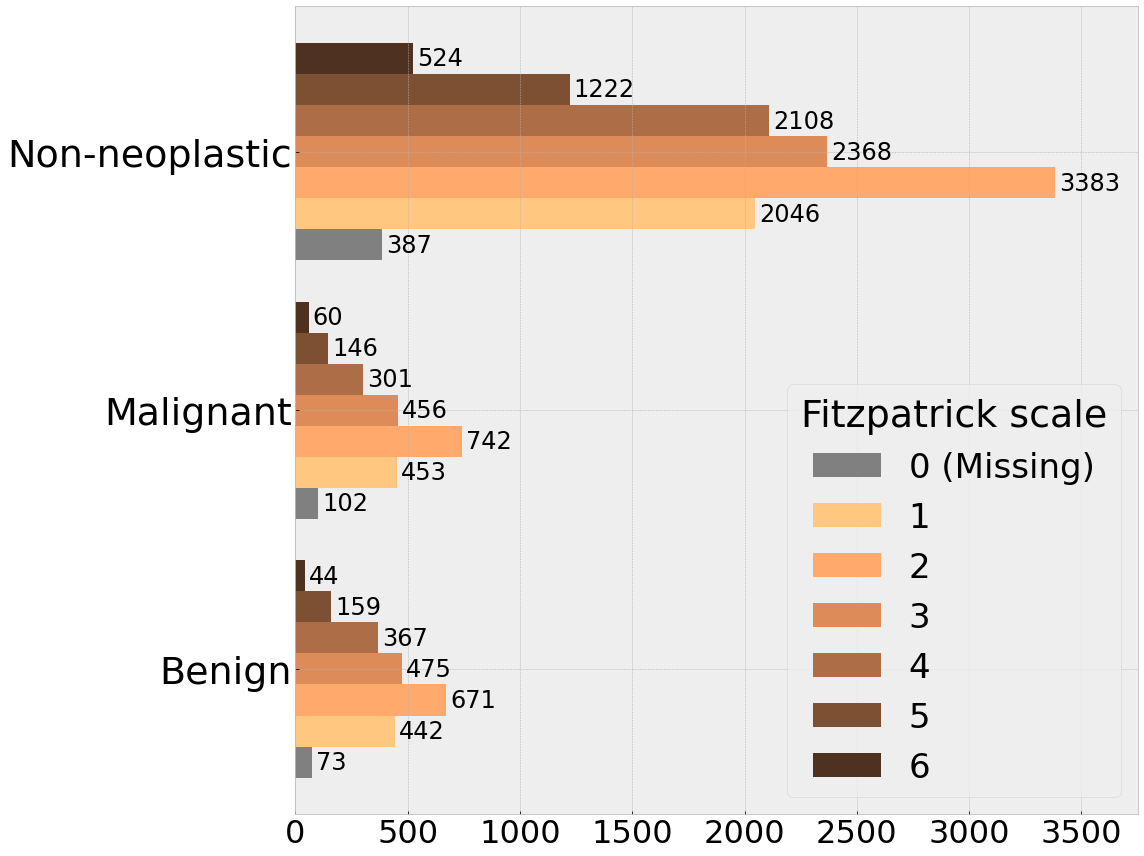

In [318]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.copper_r(np.linspace(0, 0.9, 7))
fontsize=24

classes = ['Benign', 'Malignant', 'Non-neoplastic']

x = np.arange(len(classes))  # the label locations
width = 0.12  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 12))

f0 = ax.barh(
    x - 3*width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == -1').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='0 (Missing)', color='gray',
)
f1 = ax.barh(
    x - 2*width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 1').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='1', color=colors[0]
)
f2 = ax.barh(
    x - width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 2').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='2', color=colors[1]
)
f3 = ax.barh(
    x, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 3').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='3', color=colors[2]
)
f4 = ax.barh(
    x + width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 4').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='4', color=colors[3]
)
f5 = ax.barh(
    x + 2*width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 5').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='5', color=colors[4]
)
f6 = ax.barh(
    x + 3*width, 
    list(
        map(
            lambda x: x[1],
            sorted(
                skin_df.query(f'fitzpatrick == 6').three_partition_label.value_counts(sort=False).items()
            )

        )
    ),
    width, label='6', color=colors[5]
)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_title('Distribution of disease type by skin tone', fontsize=fontsize + 16)
ax.set_xlim(0, 3750)
ax.set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500])
for t in ax.get_xticklabels():    #get_xticklabels will get you the label objects, same for y
    t.set_fontsize(fontsize + 8)
ax.set_yticks(x, classes, fontsize=fontsize + 14)
# ax.set_ylabel('Skin condition type', fontsize=fontsize + 8)

ax.legend(
    title='Fitzpatrick scale', 
    title_fontproperties={
        'style': 'normal',
        'size': fontsize + 14,
    },
    fontsize=fontsize + 10,
)

ax.bar_label(f0, padding=4, fontsize=fontsize)
ax.bar_label(f1, padding=4, fontsize=fontsize)
ax.bar_label(f2, padding=4, fontsize=fontsize)
ax.bar_label(f3, padding=4, fontsize=fontsize)
ax.bar_label(f4, padding=4, fontsize=fontsize)
ax.bar_label(f5, padding=4, fontsize=fontsize)
ax.bar_label(f6, padding=4, fontsize=fontsize)

fig.tight_layout()
plt.savefig(fig_dir / 'fitz-subgroup-class-dist.png')
plt.show()

In [424]:
total_6 = 524 + 60 + 44
total_5 = 1222 + 146 + 159
total_4 = 2108 + 301 + 367
total_3 = 2368 + 456 + 475
total_2 = 3383 + 742 + 671
total_1 = 2046 + 453 + 442
print(f'Non-neoplastic prevalence for 6 skin tone: {524 / (total_6):.3f}')
print(f'Non-neoplastic prevalence for 5 skin tone: {1222 / (total_5):.3f}')
print(f'Non-neoplastic prevalence for 4 skin tone: {2108 / (total_4):.3f}')
print(f'Non-neoplastic prevalence for 3 skin tone: {2368 / (total_3):.3f}')
print(f'Non-neoplastic prevalence for 2 skin tone: {3383 / (total_2):.3f}')
print(f'Non-neoplastic prevalence for 1 skin tone: {2046 / (total_1):.3f}')

print(f'Malignant prevalence for 6 skin tone: {60 / (total_6):.3f}')
print(f'Malignant prevalence for 5 skin tone: {146 / (total_5):.3f}')
print(f'Malignant prevalence for 4 skin tone: {301 / (total_4):.3f}')
print(f'Malignant prevalence for 3 skin tone: {456 / (total_3):.3f}')
print(f'Malignant prevalence for 2 skin tone: {742 / (total_2):.3f}')
print(f'Malignant prevalence for 1 skin tone: {453 / (total_1):.3f}')

print(f'Benign prevalence for 6 skin tone: {44 / (total_6):.3f}')
print(f'Benign prevalence for 5 skin tone: {159/ (total_5):.3f}')
print(f'Benign prevalence for 4 skin tone: {367/ (total_4):.3f}')
print(f'Benign prevalence for 3 skin tone: {475 / (total_3):.3f}')
print(f'Benign prevalence for 2 skin tone: {671/ (total_2):.3f}')
print(f'Benign prevalence for 1 skin tone: {442 / (total_1):.3f}')

Non-neoplastic prevalence for 6 skin tone: 0.834
Non-neoplastic prevalence for 5 skin tone: 0.800
Non-neoplastic prevalence for 4 skin tone: 0.759
Non-neoplastic prevalence for 3 skin tone: 0.718
Non-neoplastic prevalence for 2 skin tone: 0.705
Non-neoplastic prevalence for 1 skin tone: 0.696
Malignant prevalence for 6 skin tone: 0.096
Malignant prevalence for 5 skin tone: 0.096
Malignant prevalence for 4 skin tone: 0.108
Malignant prevalence for 3 skin tone: 0.138
Malignant prevalence for 2 skin tone: 0.155
Malignant prevalence for 1 skin tone: 0.154
Benign prevalence for 6 skin tone: 0.070
Benign prevalence for 5 skin tone: 0.104
Benign prevalence for 4 skin tone: 0.132
Benign prevalence for 3 skin tone: 0.144
Benign prevalence for 2 skin tone: 0.140
Benign prevalence for 1 skin tone: 0.150


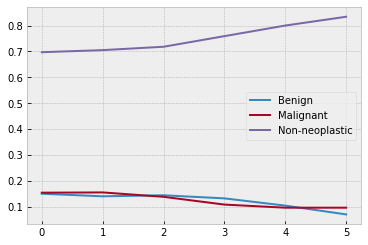

In [425]:
plt.plot([0.15, 0.14, 0.144, 0.132, 0.104, 0.07], label='Benign')
plt.plot([0.154, 0.155, 0.138, 0.108, 0.096, 0.096], label='Malignant')
plt.plot([0.697, 0.705, 0.718, 0.759, 0.8, 0.834], label='Non-neoplastic')
plt.legend()

In [20]:
fitz_df = pd.read_csv('/Users/charles.lu/Downloads/fitzpatrick17k.csv')

In [21]:
label_map = dict(enumerate(sorted(fitz_df.label.unique())))

### Multiple runs

In [22]:
list(run_dir.iterdir())

[PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/valid-res_seed_0.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/args.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/valid-res_seed_1.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/test-res_seed_1.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/test-res_seed_0.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/test-res_seed_3.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/log.txt'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/valid-res_seed_4.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/test-res_seed_2.json'),
 PosixPath('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_s

In [52]:
# run_dir = pathlib.Path('/Users/charles.lu/AAAI/fitz/fitz/')
run_dir = pathlib.Path('/Users/charles.lu/AAAI/fitz/114_class_logits-run_2021_sep_01_13_53_48/')
# run_dir = pathlib.Path('/Users/charles.lu/AAAI/fitz/fitzpatrick_raw_labels-run_2021_aug_27_17_11_30/')

valid_paths = {p.stem.replace('valid-res_', ''): p for p in run_dir.glob('valid-res_*')}
test_paths = {p.stem.replace('test-res_', ''): p for p in run_dir.glob('test-res_*')}

### Parse json results 

In [54]:
def parse(values):
    ret = {}
    image = values['meta']['image']
    label = values['meta']['label']
    subgroup = values['meta']['subgroup']
    ret['image'] = image
    ret['label'] = label
    ret['subgroup'] = subgroup
    
    #  group mc by class
    class_pred = collections.defaultdict(list)
    for k, v in values.items():
        if k.startswith('mc_'):
            for i, x in enumerate(v[0]):
                class_pred[i].append(x)
                
    for c, pred in class_pred.items():
        ret[f'pred_{c}'] = pred
        
    return ret

In [55]:
valid_dfs = {
    k: pd.DataFrame(list(map(parse, json.load(open(v)).values())))
    for k, v in valid_paths.items()
}
test_dfs = {
    k: pd.DataFrame(list(map(parse, json.load(open(v)).values())))
    for k, v in test_paths.items()
}

In [56]:
for k, df in valid_dfs.items():
    df = df[df.subgroup != 0]
    
for k, df in test_dfs.items():
    df = df[df.subgroup != 0]

### Add logits

In [57]:
# number of  classses
C = 114

In [58]:
# aggregate predictions from each class
def get_logits(row):
    all_pred = [row[f'pred_{c}'] for c in range(C)]
    return np.array(all_pred).mean(1).tolist()
    
for k, df in valid_dfs.items():
    df['logits'] = df.apply(lambda row: get_logits(row), axis=1)

for k, df in test_dfs.items():
    df['logits'] = df.apply(lambda row: get_logits(row), axis=1)

### Platt scaling 

In [59]:
importlib.reload(platt)

<module 'platt' from '/Users/charles.lu/AAAI/subgroup-uncertainty/platt.py'>

In [63]:
for k, df in valid_dfs.items():
    # learn temperature weight using validation set
    T = platt.get_platt_scaling(df.label.values, [x for x in df.logits.values])
    valid_logits = torch.tensor([x for x in df.logits.values]) 
    df['scores'] = torch.softmax(valid_logits / T, axis=1).tolist()
   
    test_df = test_dfs[k]
    test_logits = torch.tensor([x for x in test_df.logits.values]) 
    test_df['scores'] = torch.softmax(test_logits / T, axis=1).tolist()

### Confidence levels $\alpha$

$$1 - \alpha \leq P(\hat{Y}_{n+1} \in \mathcal{C}(X_{n+1})) \leq 1 - \alpha + \frac{1}{n + 1}$$

In [64]:
# ALPHAS = [0.05,  0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ALPHAS = [0.05] + [round(x, 1) for x in np.arange(0.1, 1.1, 0.1)]
ALPHAS

[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

### Conformal metrics

1. __Coverage__  - probability that the true class is contained within prediction set 
    * _Subgroup coverage_  - coverage per subgroup 
2. __Cardinality__ - expected prediction set size
    * _Subgroup cardinality_  - cardinality per subgroup 

In [65]:
# Subgroups
A = list(range(len(df.subgroup.unique())))
A

[0, 1, 2, 3, 4, 5, 6]

In [66]:
def get_coverage(labels: list, prediction_sets: list) -> float:
    N = len(labels)
    assert N
    correct = 0
    for label, pred in zip(labels, prediction_sets):
        correct += 1 if label in pred else 0
    return correct / N

def get_subgroup_coverage(
        df, 
        pred_col,
        label_col='label',
        subgroup_col='subgroup',
        subgroups=A,
    ) -> dict:
    res = {}
    for a in subgroups:
        sub_df = df[df[subgroup_col] == a]
        res[a] = get_coverage(
            sub_df[label_col].values.tolist(),
            sub_df[pred_col].values.tolist(),
        )
    return res

def get_cardinality(prediction_sets: list) -> float:
    N = len(prediction_sets)
    assert N
    return sum([len(x) for x in prediction_sets]) / N

def get_subgroup_cardinality(
        df, 
        pred_col,
        subgroup_col='subgroup',
        subgroups=A,
    ) -> dict:
    res = {}
    for a in subgroups:
        sub_df = df[df[subgroup_col] == a]
        res[a] = get_cardinality(
            sub_df[pred_col].values.tolist(),
        )
    return res

### Helper functions

In [67]:
def aggregate_coverage(dfs, prefix, alphas=ALPHAS):
    # Collate prediction sets for all runs at different levels of coverage
    coverage_by_alpha = collections.defaultdict(list)
    for seed, df in dfs.items():
        for alpha in alphas:
            labels = [x for x in dfs[seed].label.values]
            prediction_sets = [x for x in dfs[seed][f'{prefix}_{alpha}'].values]
            coverage_by_alpha[alpha].append(get_coverage(labels, prediction_sets))
    
    coverage_by_alpha = dict(coverage_by_alpha)
    alpha, coverage = zip(*coverage_by_alpha.items())
    coverage = np.array(coverage)
    coverage_mean = coverage.mean(1)
    coverage_std = coverage.std(1)
    return alpha, coverage_mean, coverage_std
    
def aggregate_cardinality(dfs, prefix, alphas=ALPHAS):
    cardinality_by_alpha = collections.defaultdict(list)

    for seed, df in dfs.items():
        for alpha in ALPHAS:
            labels = [x for x in dfs[seed].label.values]
            prediction_sets = [x for x in dfs[seed][f'{prefix}_{alpha}'].values]
            cardinality_by_alpha[alpha].append(get_cardinality(prediction_sets))

    cardinality_by_alpha = dict(cardinality_by_alpha)
    alpha, cardinality = zip(*cardinality_by_alpha.items())
    cardinality = np.array(cardinality)
    cardinality_mean = cardinality.mean(1)
    cardinality_std = cardinality.std(1)
    return alpha, cardinality_mean, cardinality_std

In [68]:
# Helper functions for subgroup
def aggregate_coverage_subgroup(dfs, prefix, alphas=ALPHAS):
    # Collate prediction sets for all runs at different levels of coverage
    subgroup_coverage_by_alpha = collections.defaultdict(dict)
    for seed, df in dfs.items():
        for alpha in alphas:
            for sub, cov in get_subgroup_coverage(df, f'{prefix}_{alpha}').items():
                if sub in subgroup_coverage_by_alpha[alpha]:
                    subgroup_coverage_by_alpha[alpha][sub] += [cov]
                else:
                    subgroup_coverage_by_alpha[alpha][sub] = [cov]
    
    alpha, subgroup_cov = zip(*subgroup_coverage_by_alpha.items())

    coverage_mean = collections.defaultdict(list)
    coverage_std = collections.defaultdict(list)

    for res in subgroup_cov:
        for group, cov in res.items():
            cov = np.array(cov)
            coverage_mean[group].append(cov.mean())
            coverage_std[group].append(cov.std())

    coverage_mean = dict(coverage_mean)
    coverage_std = dict(coverage_std)
    
    return alpha, coverage_mean, coverage_std

    
def aggregate_cardinality_subgroup(dfs, prefix, alphas=ALPHAS):
    subgroup_cardinality_by_alpha = collections.defaultdict(dict)

    for seed, df in dfs.items():
        for alpha in ALPHAS:
            for sub, card in get_subgroup_cardinality(df, f'{prefix}_{alpha}').items():
                if sub in subgroup_cardinality_by_alpha[alpha]:
                    subgroup_cardinality_by_alpha[alpha][sub] += [card]
                else:
                    subgroup_cardinality_by_alpha[alpha][sub] = [card]

    subgroup_cardinality_by_alpha = dict(subgroup_cardinality_by_alpha)
    alpha, cardinality = zip(*subgroup_cardinality_by_alpha.items())
    
    cardinality_mean = collections.defaultdict(list)
    cardinality_std = collections.defaultdict(list)

    for res in cardinality:
        for group, card in res.items():
            card = np.array(card)
            cardinality_mean[group].append(card.mean())
            cardinality_std[group].append(card.std())

    cardinality_mean = dict(cardinality_mean)
    cardinality_std = dict(cardinality_std)
    
    return alpha, cardinality_mean, cardinality_std

### Naive prediction sets

* temperature scaling
* no cumulative summing of scores

In [69]:
torch.quantile(torch.tensor(
    [1 - row.scores[row.label] for i, row in  df.iterrows()]
)
    , np.ceil((len(df) + 1)*(1 - 0.1))/len(df))

tensor(0.9973)

In [70]:
naive_qhat = {}
for k, df in valid_dfs.items():
    scores = [x for x in df.scores.values]
    labels = [x for x in df.label.values]
    s = torch.tensor([1 - s[l] for s, l in zip(scores, labels)])
    n = len(df)
    for alpha in ALPHAS:
        p = np.ceil((n + 1) * (1 - alpha)) / n
        naive_qhat[alpha] = torch.quantile(s, p).item()
        
for k, df in test_dfs.items():
    scores = np.array([x for x in df.scores.values])
    for alpha in ALPHAS:
        df[f'naive_{alpha}'] = [np.nonzero(s > (1 - naive_qhat[alpha]))[0] for s in scores]

In [71]:
columns = [f'naive_{alpha}' for alpha in ALPHAS]
test_dfs['seed_0'][columns].head()

,naive_0.05,naive_0.1,naive_0.2,naive_0.3,naive_0.4,naive_0.5,naive_0.6,naive_0.7,naive_0.8,naive_0.9,naive_1.0
0,"[1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 15, 16, 17, ...","[1, 3, 5, 6, 8, 12, 13, 15, 17, 21, 22, 23, 26...","[1, 3, 5, 6, 8, 13, 22, 27, 30, 31, 32, 34, 36...","[5, 6, 8, 31, 32, 42, 43, 48, 51, 63, 64, 68, ...","[6, 8, 31, 32, 42, 43, 48, 63, 64, 68, 75, 85,...","[31, 48, 63, 64, 85, 86]","[48, 64, 85, 86]",[64],[],[],[]
1,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 16,...","[1, 2, 5, 6, 7, 8, 11, 13, 15, 17, 19, 20, 22,...","[2, 5, 6, 8, 11, 13, 15, 17, 19, 22, 28, 31, 3...","[5, 6, 8, 13, 17, 19, 22, 28, 31, 32, 36, 48, ...","[5, 6, 13, 19, 28, 31, 36, 48, 51, 68, 84, 86,...","[31, 36, 51, 84, 86, 98]",[86],[],[],[],[]
2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[1, 2, 3, 5, 6, 8, 9, 11, 13, 14, 15, 16, 17, ...","[1, 2, 5, 6, 8, 13, 15, 17, 19, 20, 22, 28, 32...","[1, 2, 5, 6, 8, 13, 19, 20, 22, 51, 52, 54, 60...","[1, 2, 5, 6, 20, 51, 60, 92, 98]","[1, 2, 5, 60, 98]",[2],[],[],[],[]
3,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[2, 5, 6, 7, 8, 13, 14, 16, 17, 19, 22, 26, 28...","[2, 6, 8, 14, 16, 17, 19, 28, 40, 48, 56, 68, ...","[2, 8, 48, 86, 91, 100, 110]","[2, 8, 91]","[2, 91]",[2],[],[],[]
4,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16...","[1, 2, 3, 5, 6, 8, 9, 10, 12, 16, 17, 18, 19, ...","[1, 2, 5, 6, 8, 12, 16, 18, 21, 22, 24, 34, 37...","[2, 5, 6, 12, 16, 37, 41, 44, 48, 53, 55, 57, ...","[2, 6, 12, 16, 41, 44, 53, 69, 93, 103, 110]","[2, 6, 53, 103]",[103],[],[],[],[]


In [72]:
alpha, naive_coverage_mean, naive_coverage_std = aggregate_coverage(test_dfs, prefix='naive')
alpha, naive_cardinality_mean, naive_cardinality_std = aggregate_cardinality(test_dfs, prefix='naive')

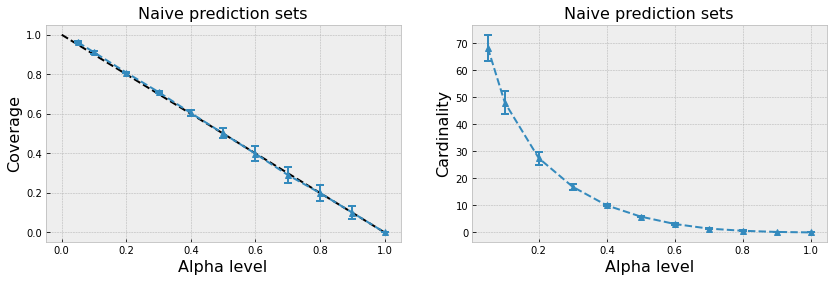

In [73]:
fontsize=16
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].plot([0, 1], [1, 0], '--', c='k', label='Marginal Coverage')
ax[0].errorbar(
    alpha, naive_coverage_mean, yerr=naive_coverage_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[0].set_title('Naive prediction sets', fontsize=fontsize)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, naive_cardinality_mean, yerr=naive_cardinality_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[1].set_title('Naive prediction sets', fontsize=fontsize)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.show()

### Adaptive prediction set (APS)

* Calibration set for correct marginal coverage

In [74]:
importlib.reload(conformal)

<module 'conformal' from '/Users/charles.lu/AAAI/subgroup-uncertainty/conformal.py'>

In [75]:
# calibrate 
aps_qhat = collections.defaultdict(dict)
for k, df in valid_dfs.items():
    scores = [x for x in df.scores.values]
    labels = [x for x in df.label.values]
    for alpha in ALPHAS:
        qhat = conformal.get_q_hat(scores, labels, alpha=alpha)
        aps_qhat[k][alpha] = qhat.item()
        
aps_qhat = dict(aps_qhat)

In [76]:
# inference
for k, df in test_dfs.items():
    scores = [x for x in df.scores.values]
    for alpha in ALPHAS:
        qhat = aps_qhat[k][alpha]
        df[f'aps_{alpha}'] = conformal.conformal_inference(scores, qhat)

In [77]:
columns = [f'aps_{alpha}' for alpha in ALPHAS]
test_dfs['seed_0'][columns].head()

,aps_0.05,aps_0.1,aps_0.2,aps_0.3,aps_0.4,aps_0.5,aps_0.6,aps_0.7,aps_0.8,aps_0.9,aps_1.0
0,"[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75]","[64, 48, 86, 85, 31, 63, 6, 43]","[64, 48, 86, 85, 31]","[64, 48, 86]","[64, 48]",[64]
1,"[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5]","[86, 98, 36, 51, 84, 31, 92, 19]","[86, 98, 36, 51, 84]","[86, 98, 36]",[86]
2,"[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22]","[2, 5, 60, 98, 1, 6, 51, 20, 92]","[2, 5, 60, 98, 1]","[2, 5, 60]",[2]
3,"[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 19]","[2, 91, 8, 48, 86, 100, 110, 75]","[2, 91, 8, 48]","[2, 91]",[2]
4,"[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 55]","[103, 6, 53, 2, 41, 93, 44, 110, 12]","[103, 6, 53, 2, 41, 93]","[103, 6, 53]",[103]


In [78]:
alpha, aps_coverage_mean, aps_coverage_std = aggregate_coverage(test_dfs, prefix='aps')
alpha, aps_cardinality_mean, aps_cardinality_std = aggregate_cardinality(test_dfs, prefix='aps')

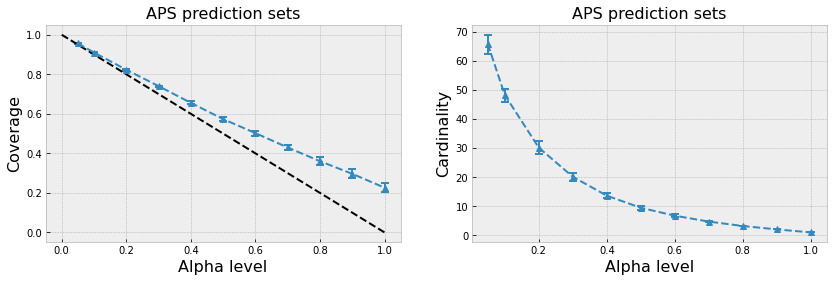

In [79]:
fontsize=16
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].errorbar(
    alpha, aps_coverage_mean, yerr=aps_coverage_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[0].plot([0, 1], [1, 0], '--', c='k', label='Marginal Coverage')
ax[0].set_title('APS prediction sets', fontsize=fontsize)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, aps_cardinality_mean, yerr=aps_cardinality_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[1].set_title('APS prediction sets', fontsize=fontsize)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.show()

### Regularized adaptive prediction set (RAPS)

* Calibration set for correct marginal coverage
* Parameterized regulaization penality $\lambda$ and $K$

In [80]:
K_REG = 20
LAMBDA = 1e-4

penalty = np.zeros((1, C))
penalty[:, K_REG:] += LAMBDA

# randomized
RAND = True

# allow zero sets
ZERO = True  

In [81]:
# calibrate 
raps_qhat = collections.defaultdict(dict)
for k, df in valid_dfs.items():
    scores = np.array([x for x in df.scores.values])
    labels = np.array([x for x in df.label.values])
    index, ordered, cumsum = conformal.sort_sum(scores)
    for alpha in ALPHAS:
        qhat = conformal.raps_calibrate(
            scores, labels, index, ordered, cumsum,
            penalty, randomized=RAND, allow_zero_sets=ZERO, alpha=alpha
        )
        raps_qhat[k][alpha] = qhat
        
raps_qhat = dict(raps_qhat)

In [82]:
# inference
for k, df in test_dfs.items():
    scores = np.array([x for x in df.scores.values])
    index, ordered, cumsum = conformal.sort_sum(scores)
    for alpha in ALPHAS:
        qhat = raps_qhat[k][alpha]
        df[f'raps_{alpha}'] = conformal.raps_predict(
            C, qhat, index, ordered, cumsum, 
            penalty, randomized=RAND, allow_zero_sets=ZERO,
        )

In [83]:
columns = [f'raps_{alpha}' for alpha in ALPHAS]
test_dfs['seed_0'][columns].head()

,raps_0.05,raps_0.1,raps_0.2,raps_0.3,raps_0.4,raps_0.5,raps_0.6,raps_0.7,raps_0.8,raps_0.9,raps_1.0
0,"[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42, 32, 75...","[64, 48, 86, 85, 31, 63, 6, 43, 91, 42]","[64, 48, 86, 85, 31, 63, 6]","[64, 48, 86, 85, 31]","[64, 48, 86]","[64, 48]",[64]
1,"[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91, 5, 48,...","[86, 98, 36, 51, 84, 31, 92, 19, 6, 91]","[86, 98, 36, 51, 84, 31, 92]","[86, 98, 36, 51]","[86, 98]",[86]
2,"[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95, 8, 22...","[2, 5, 60, 98, 1, 6, 51, 20, 92, 54, 95]","[2, 5, 60, 98, 1, 6, 51, 20]","[2, 5, 60, 98]","[2, 5]",[]
3,"[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14, 68, 1...","[2, 91, 8, 48, 86, 100, 110, 75, 98, 14]","[2, 91, 8, 48, 86, 100]","[2, 91, 8]",[2],[2]
4,"[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16, 5...","[103, 6, 53, 2, 41, 93, 44, 110, 12, 69, 16]","[103, 6, 53, 2, 41, 93, 44]","[103, 6, 53, 2, 41]","[103, 6]",[103]


In [84]:
alpha, raps_coverage_mean, raps_coverage_std = aggregate_coverage(test_dfs, prefix='raps')
alpha, raps_cardinality_mean, raps_cardinality_std = aggregate_cardinality(test_dfs, prefix='raps')

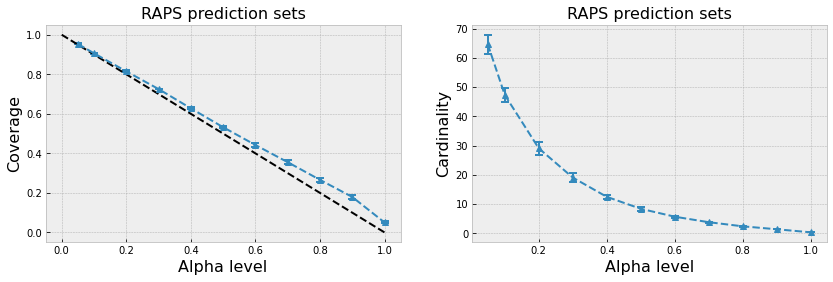

In [85]:
fontsize=16
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].errorbar(
    alpha, raps_coverage_mean, yerr=raps_coverage_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[0].plot([0, 1], [1, 0], '--', c='k', label='Marginal Coverage')
ax[0].set_title('RAPS prediction sets', fontsize=fontsize)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, raps_cardinality_mean, yerr=raps_cardinality_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[1].set_title('RAPS prediction sets', fontsize=fontsize)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.show()

### Group APS (GAPS)

In [86]:
# calibrate 
gaps_qhat = collections.defaultdict(dict)

for k, df in valid_dfs.items():
    alpha_qhat = collections.defaultdict(dict)
    for alpha in ALPHAS:
        group_qhat = collections.defaultdict(dict)
        for a in A:
            group_df = df[df.subgroup == a]
            
            # APS
            scores = [x for x in group_df.scores.values]
            labels = [x for x in group_df.label.values]
            qhat = conformal.get_q_hat(scores, labels, alpha=alpha)
            gaps_qhat[k][alpha] = qhat.item()

            group_qhat[a] = qhat
            
        alpha_qhat[alpha] = dict(group_qhat)
        
    gaps_qhat[k] = dict(alpha_qhat)

gaps_qhat = dict(gaps_qhat)


In [98]:
# inference

for k, df in test_dfs.items():
    temp = []
    scores = np.array([x for x in df.scores.values])
    index, ordered, cumsum = conformal.sort_sum(scores)
    for a in A:
        group_df = df[df.subgroup == a].copy()
        
        # APS
        scores = [x for x in group_df.scores.values]
        for alpha in ALPHAS:
            qhat = gaps_qhat[k][alpha][a]
            group_df[f'gaps_{alpha}'] = conformal.conformal_inference(scores, qhat)
        
        temp.append(group_df)
    test_dfs[k] = pd.concat(temp)

In [103]:
# columns = [f'gaps_{alpha}' for alpha in ALPHAS]
columns = [f'gaps_{alpha}' for alpha in ALPHAS]
test_dfs['seed_0'][columns].head()

,gaps_0.05,gaps_0.1,gaps_0.2,gaps_0.3,gaps_0.4,gaps_0.5,gaps_0.6,gaps_0.7,gaps_0.8,gaps_0.9,gaps_1.0
21,"[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97]","[98, 8, 33, 86, 48, 13, 5, 82]","[98, 8, 33, 86, 48]","[98, 8, 33]","[98, 8]",[98]
43,"[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15]","[98, 13, 84, 31, 51, 19, 45]","[98, 13, 84, 31]","[98, 13]",[98]
82,"[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55]","[48, 6, 19, 86]","[48, 6]"
129,"[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75]","[51, 19, 86, 17, 92, 60, 52]","[51, 19, 86, 17, 92]","[51, 19, 86]",[51],[51]
203,"[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 68]","[8, 86, 56, 98, 108, 88, 5, 91, 48]","[8, 86, 56, 98]","[8, 86]",[8]


### Group RAPS (GRAPS)

In [104]:
# calibrate 
graps_qhat = collections.defaultdict(dict)

for k, df in valid_dfs.items():
    alpha_qhat = collections.defaultdict(dict)
    for alpha in ALPHAS:
        group_qhat = collections.defaultdict(dict)
        for a in A:
            group_df = df[df.subgroup == a]
            
            scores = np.array([x for x in group_df.scores.values])
            labels = np.array([x for x in group_df.label.values])
            index, ordered, cumsum = conformal.sort_sum(scores)
            qhat = conformal.raps_calibrate(
                scores, labels, index, ordered, cumsum,
                penalty, randomized=RAND, allow_zero_sets=ZERO, alpha=alpha
            )
            
            group_qhat[a] = qhat
            
        alpha_qhat[alpha] = dict(group_qhat)
        
    graps_qhat[k] = dict(alpha_qhat)

graps_qhat = dict(graps_qhat)


In [105]:
# inference

for k, df in test_dfs.items():
    temp = []
    scores = np.array([x for x in df.scores.values])
    index, ordered, cumsum = conformal.sort_sum(scores)
    for a in A:
        group_df = df[df.subgroup == a].copy()
        
        # RAPS
        scores = np.array([x for x in group_df.scores.values])
        for alpha in ALPHAS:
            qhat = graps_qhat[k][alpha][a]
            index, ordered, cumsum = conformal.sort_sum(scores)
            group_df[f'graps_{alpha}'] = conformal.raps_predict(
                C, qhat.item(), index, ordered, cumsum, 
                penalty, randomized=RAND, allow_zero_sets=ZERO,
            )
            
        temp.append(group_df)
    test_dfs[k] = pd.concat(temp)

In [106]:
# columns = [f'gaps_{alpha}' for alpha in ALPHAS]
columns = [f'graps_{alpha}' for alpha in ALPHAS]
test_dfs['seed_0'][columns].head()

,graps_0.05,graps_0.1,graps_0.2,graps_0.3,graps_0.4,graps_0.5,graps_0.6,graps_0.7,graps_0.8,graps_0.9,graps_1.0
21,"[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91, 97,...","[98, 8, 33, 86, 48, 13, 5, 82, 59, 11, 91]","[98, 8, 33, 86, 48, 13]","[98, 8, 33, 86]","[98, 8]",[98],[98]
43,"[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86, 93, 15, 75, 2...","[98, 13, 84, 31, 51, 19, 45, 86]","[98, 13, 84, 31, 51]","[98, 13, 84]",[98],[98]
82,"[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75, 17...","[48, 6, 19, 86, 13, 2, 33, 55, 111, 68, 75]","[48, 6, 19, 86, 13, 2]","[48, 6, 19]","[48, 6]"
129,"[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28, 2, 75, 5, 95,...","[51, 19, 86, 17, 92, 60, 52, 28]","[51, 19, 86, 17, 92]","[51, 19, 86]","[51, 19]",[51],[51]
203,"[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102, 19, 6...","[8, 86, 56, 98, 108, 88, 5, 91, 48, 102]","[8, 86, 56, 98, 108, 88, 5]","[8, 86, 56, 98]",[8],[]


In [107]:
test_dfs['seed_0'].columns

Index(['image', 'label', 'subgroup', 'pred_0', 'pred_1', 'pred_2', 'pred_3',
       'pred_4', 'pred_5', 'pred_6',
       ...
       'gaps_0.1', 'gaps_0.2', 'gaps_0.3', 'gaps_0.4', 'gaps_0.5', 'gaps_0.6',
       'gaps_0.7', 'gaps_0.8', 'gaps_0.9', 'gaps_1.0'],
      dtype='object', length=174)

In [108]:
alpha, gaps_coverage_mean, gaps_coverage_std = aggregate_coverage(test_dfs, prefix='gaps')
alpha, gaps_cardinality_mean, gaps_cardinality_std = aggregate_cardinality(test_dfs, prefix='gaps')
alpha, graps_coverage_mean, graps_coverage_std = aggregate_coverage(test_dfs, prefix='graps')
alpha, graps_cardinality_mean, graps_cardinality_std = aggregate_cardinality(test_dfs, prefix='graps')

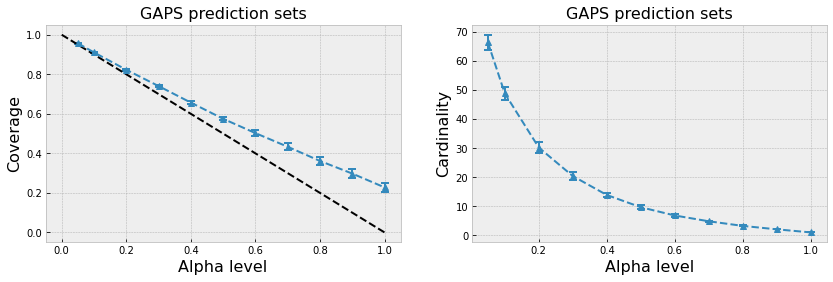

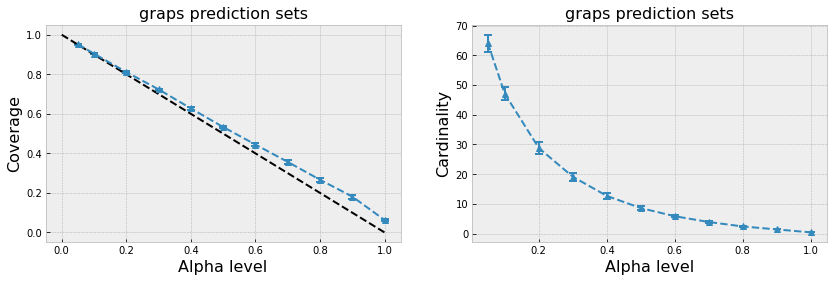

In [109]:
fontsize=16
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].errorbar(
    alpha, gaps_coverage_mean, yerr=gaps_coverage_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[0].plot([0, 1], [1, 0], '--', c='k', label='Marginal Coverage')
ax[0].set_title('GAPS prediction sets', fontsize=fontsize)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, gaps_cardinality_mean, yerr=gaps_cardinality_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[1].set_title('GAPS prediction sets', fontsize=fontsize)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.show()

fontsize=16
fig, ax = plt.subplots(ncols=2, figsize=(14, 4))
ax[0].errorbar(
    alpha, graps_coverage_mean, yerr=graps_coverage_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[0].plot([0, 1], [1, 0], '--', c='k', label='Marginal Coverage')
ax[0].set_title('graps prediction sets', fontsize=fontsize)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, graps_cardinality_mean, yerr=graps_cardinality_std, 
    marker='^', ls='--', capthick=2, capsize=4,
)
ax[1].set_title('graps prediction sets', fontsize=fontsize)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.show()

### Comparison

In [110]:
jitter = np.random.randn(*naive_coverage_mean.shape) / 90

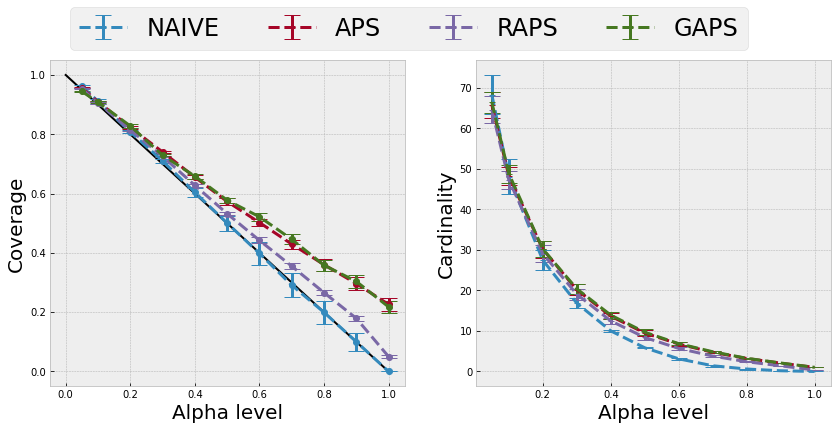

In [111]:
capsize = 8
fontsize=20
capthick=1
lw = 3
marker='o'
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))
ax[0].plot([1, 0], [0, 1], c='k', label='Ideal Coverage')
ax[0].errorbar(
    alpha, naive_coverage_mean, yerr=naive_coverage_std, lw=lw,
    marker=marker, ls='--', capthick=capthick, capsize=capsize, label='NAIVE',
)
ax[0].errorbar(
    alpha, aps_coverage_mean, yerr=aps_coverage_std, lw=lw,
    marker=marker, ls='--', capthick=capthick, capsize=capsize, label='APS',
)
ax[0].errorbar(
    alpha, raps_coverage_mean, yerr=raps_coverage_std, lw=lw,
    marker=marker, ls='--', capthick=capthick, capsize=capsize, label='RAPS',
)
ax[0].errorbar(
    alpha, gaps_coverage_mean + jitter, yerr=gaps_coverage_std, lw=lw,
    marker=marker, ls='--', capthick=capthick, capsize=capsize, label='GAPS',
)
ax[0].set_xlabel('Alpha level', fontsize=fontsize)
ax[0].set_ylabel('Coverage', fontsize=fontsize)

ax[1].errorbar(
    alpha, naive_cardinality_mean, yerr=naive_cardinality_std, lw=lw,
    marker='_', ls='--', capthick=capthick, capsize=capsize, label='NAIVE',
)
ax[1].errorbar(
    alpha, aps_cardinality_mean, yerr=aps_cardinality_std, lw=lw,
    marker='_', ls='--', capthick=capthick, capsize=capsize, label='APS',
)
ax[1].errorbar(
    alpha, raps_cardinality_mean, yerr=raps_cardinality_std, lw=lw,
    marker='_', ls='--', capthick=capthick, capsize=capsize, label='RAPS',
)
ax[1].errorbar(
    alpha, gaps_cardinality_mean + jitter, yerr=gaps_cardinality_std, lw=lw,
    marker='_', ls='--', capthick=capthick, capsize=capsize, label='GAPS',
)
ax[1].set_xlabel('Alpha level', fontsize=fontsize)
ax[1].set_ylabel('Cardinality', fontsize=fontsize)
plt.legend(fontsize=fontsize + 4, bbox_to_anchor=(0.8, 1.2), ncol=4)
# plt.savefig('/Users/charles.lu/AAAi/figures/fitz-compare.png')
plt.show()

In [112]:
alpha, naive_subgroup_coverage_mean, naive_subgroup_coverage_std = aggregate_coverage_subgroup(
    test_dfs, prefix='naive'
)
alpha, naive_subgroup_cardinality_mean, naive_subgroup_cardinality_std = aggregate_cardinality_subgroup(
    test_dfs, prefix='naive'
)
alpha, aps_subgroup_coverage_mean, aps_subgroup_coverage_std = aggregate_coverage_subgroup(
    test_dfs, prefix='aps'
)
alpha, aps_subgroup_cardinality_mean, aps_subgroup_cardinality_std = aggregate_cardinality_subgroup(
    test_dfs, prefix='aps'
)
alpha, raps_subgroup_coverage_mean, raps_subgroup_coverage_std = aggregate_coverage_subgroup(
    test_dfs, prefix='raps'
)
alpha, raps_subgroup_cardinality_mean, raps_subgroup_cardinality_std = aggregate_cardinality_subgroup(
    test_dfs, prefix='raps'
)
alpha, gaps_subgroup_coverage_mean, gaps_subgroup_coverage_std = aggregate_coverage_subgroup(
    test_dfs, prefix='gaps'
)
alpha, gaps_subgroup_cardinality_mean, gaps_subgroup_cardinality_std = aggregate_cardinality_subgroup(
    test_dfs, prefix='gaps'
)
alpha, graps_subgroup_coverage_mean, graps_subgroup_coverage_std = aggregate_coverage_subgroup(
    test_dfs, prefix='graps'
)
alpha, graps_subgroup_cardinality_mean, graps_subgroup_cardinality_std = aggregate_cardinality_subgroup(
    test_dfs, prefix='graps'
)

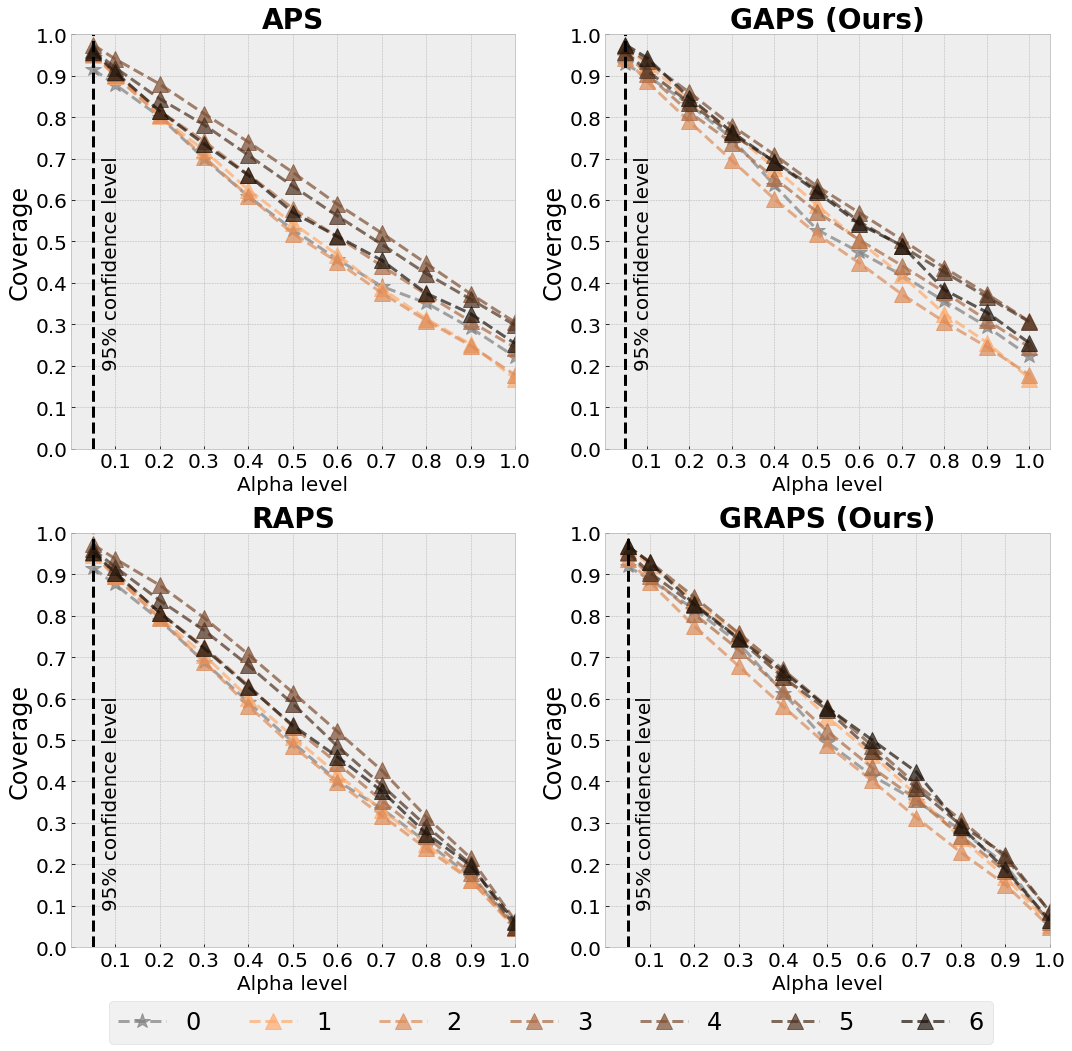

In [409]:
fontsize=24
labelsize=20
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 14), sharex=False, sharey=False)
ls='--'
lw=3
marker = '^'
ms = 16
alpha=0.7
xticks = np.arange(0.1, 1.1, 0.1)
yticks = np.arange(0, 1.1, 0.1)
xlim = (0, 1)
ylim = (0, 1)

plt.cm.copper_r
color = plt.cm.copper_r(np.linspace(0, 0.9, 7))

# for i, (k, v) in enumerate(naive_subgroup_coverage_mean.items()):
#     ax[0, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, alpha=alpha, marker=marker if i != 0 else '*', ms=ms, c=color[i] if i != 0 else 'darkgray')
# ax[0, 0].set_title('NAIVE', fontsize=fontsize)
# ax[0, 0].set_ylabel('Coverage', fontsize=fontsize)
# ax[0, 0].set_xticks(xticks)
# ax[0, 0].tick_params(axis='x', labelsize=labelsize)
# ax[0, 0].tick_params(axis='y', labelsize=labelsize)

# ax[0, 0].plot([0.1, 1], [1, 0], '--', c='k')
for i, (k, v) in enumerate(aps_subgroup_coverage_mean.items()):
    ax[0, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, alpha=alpha, marker=marker if i != 0 else '*', ms=ms, c=color[i] if i != 0 else 'gray')
ax[0, 0].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[0, 0].text(0.07, 0.20,'95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[0, 0].set_title('APS', fontsize=fontsize + 4, fontweight='bold')
ax[0, 0].set_xlim(*xlim)
ax[0, 0].set_ylim(*ylim)
ax[0, 0].set_xlabel('Alpha level', fontsize=fontsize -4)
ax[0, 0].set_ylabel('Coverage', fontsize=fontsize)
ax[0, 0].set_xticks(xticks)
ax[0, 0].set_yticks(yticks)
ax[0, 0].tick_params(axis='x', labelsize=labelsize)
ax[0, 0].tick_params(axis='y', labelsize=labelsize)

# ax[1, 0].plot([0.1, 1], [1, 0], '--', c='k')
for i, (k, v) in enumerate(raps_subgroup_coverage_mean.items()):
    ax[1, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, alpha=alpha, marker=marker if i != 0 else '*', ms=ms, c=color[i] if i != 0 else 'gray')
ax[1, 0].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[1, 0].text(0.07, 0.10,'95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[1, 0].set_title('RAPS', fontsize=fontsize + 4, fontweight='bold')
ax[1, 0].set_xlim(*xlim)
ax[1, 0].set_ylim(*ylim)
ax[1, 0].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[1, 0].set_ylabel('Coverage', fontsize=fontsize)
ax[1, 0].set_xticks(xticks)
ax[1, 0].set_yticks(yticks)
ax[1, 0].tick_params(axis='x', labelsize=labelsize)
ax[1, 0].tick_params(axis='y', labelsize=labelsize)

# ax[0, 1].plot([0, 1], [1, 0], '--', c='k')
for i, (k, v) in enumerate(gaps_subgroup_coverage_mean.items()):
    ax[0, 1].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, alpha=alpha, marker=marker if i != 0 else '*', ms=ms, c=color[i] if i != 0 else 'gray')
ax[0, 1].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[0, 1].text(0.07, 0.20,'95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[0, 1].set_title('GAPS (Ours)', fontsize=fontsize + 4, fontweight='bold')
ax[0, 1].set_ylim(*ylim)
ax[0, 1].set_ylim(*ylim)
ax[0, 1].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[0, 1].set_ylabel('Coverage', fontsize=fontsize)
ax[0, 1].set_xticks(xticks)
ax[0, 1].set_yticks(yticks)
ax[0, 1].tick_params(axis='x', labelsize=labelsize )
ax[0, 1].tick_params(axis='y', labelsize=labelsize)

# ax[1, 1].plot([0, 1], [1, 0], '--', c='k')
for i, (k, v) in enumerate(graps_subgroup_coverage_mean.items()):
    ax[1, 1].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, alpha=alpha, marker=marker if i != 0 else '*', ms=ms, c=color[i] if i != 0 else 'gray')
ax[1, 1].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[1, 1].text(0.07, 0.10,'95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[1, 1].set_title('GRAPS (Ours)', fontsize=fontsize + 4, fontweight='bold')
ax[1, 1].set_xlim(*xlim)
ax[1, 1].set_ylim(*ylim)
ax[1, 1].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[1, 1].set_ylabel('Coverage', fontsize=fontsize)
ax[1, 1].set_xticks(xticks)
ax[1, 1].set_yticks(yticks)
ax[1, 1].tick_params(axis='x', labelsize=labelsize )
ax[1, 1].tick_params(axis='y', labelsize=labelsize)

plt.tight_layout()
plt.legend(fontsize=fontsize, bbox_to_anchor=(0.90, -0.10, 0, 0), ncol=7)
plt.savefig('/Users/charles.lu/AAAI/figures/fitz-subgroup-coverage.png')

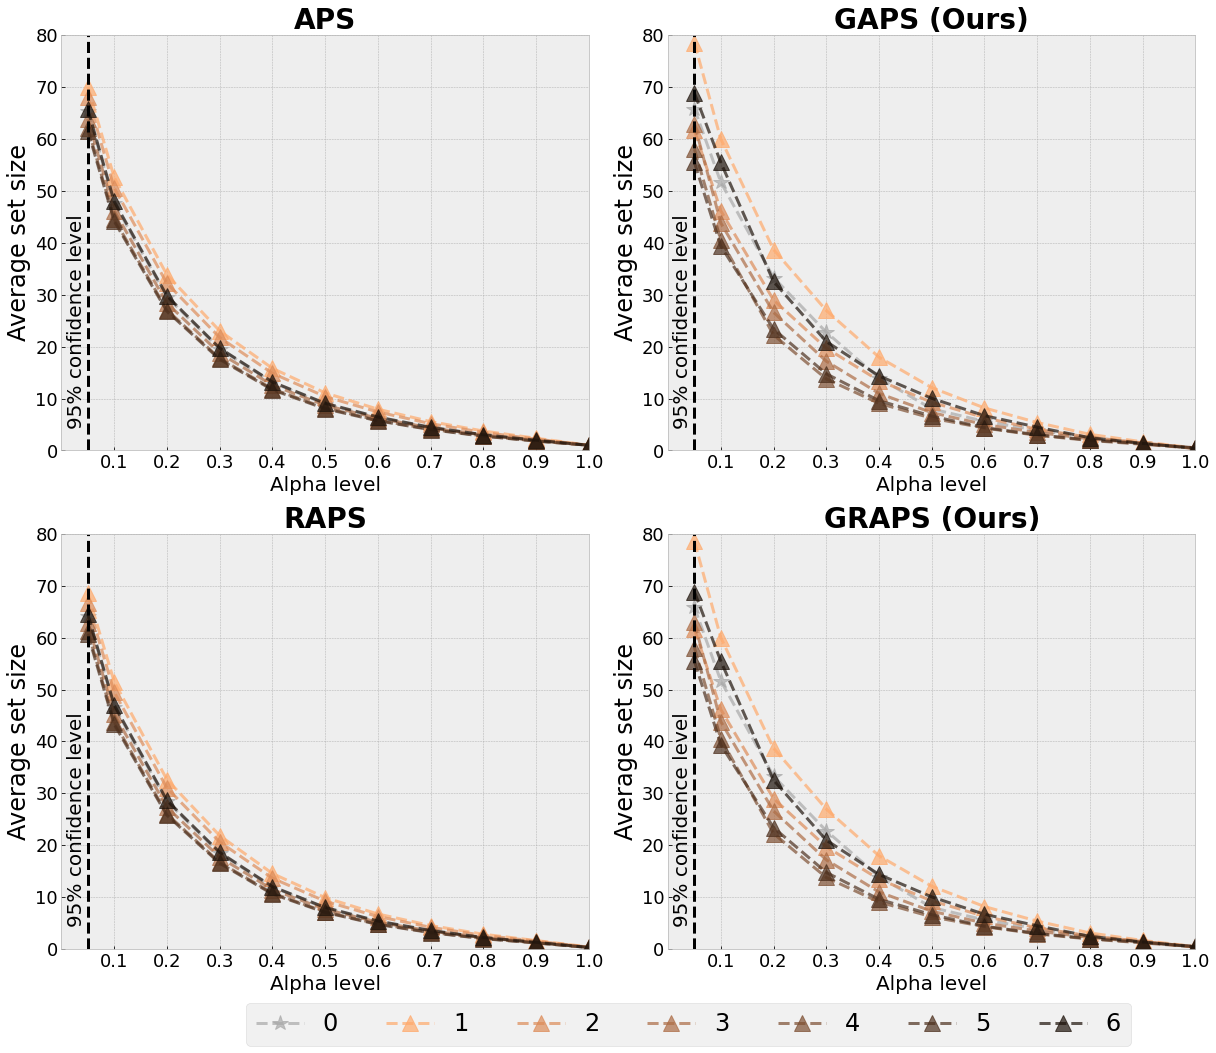

In [413]:
fontsize=24
labelsize=18
marker = '^'
ms = 16
ls = '--'
lw=3
alpha=0.7
xticks = np.arange(0.1, 1.1, 0.1)
xlim = (0, 1)
ylim = (0, 80)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(17, 14), sharex=False, sharey=False)
color = plt.cm.copper_r(np.linspace(0, 0.9, 7))

# for i, (k, v) in enumerate(naive_subgroup_cardinality_mean.items()):
#     ax[0, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, marker=marker if i != 0 else '*', ms=ms, alpha=alpha, c=color[i] if i != 0 else 'darkgray')
# ax[0, 0].set_xlim(*xlim)
# ax[0, 0].set_title('NAIVE', fontsize=fontsize)
# ax[0, 0].set_ylabel('Cardinality', fontsize=fontsize)
# ax[0, 0].set_xticks(xticks)
# ax[0, 0].tick_params(axis='x', labelsize=labelsize)
# ax[0, 0].tick_params(axis='y', labelsize=labelsize)

for i, (k, v) in enumerate(aps_subgroup_cardinality_mean.items()):
    ax[0, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, marker=marker if i != 0 else '*', ms=ms, alpha=alpha, c=color[i] if i != 0 else 'darkgray')
ax[0, 0].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[0, 0].text(0.01, 5, '95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[0, 0].set_xlim(*xlim)
ax[0, 0].set_ylim(*ylim)
ax[0, 0].set_title('APS', fontsize=fontsize + 4, fontweight='bold')
ax[0, 0].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[0, 0].set_ylabel('Average set size', fontsize=fontsize)
ax[0, 0].set_xticks(xticks)
ax[0, 0].tick_params(axis='x', labelsize=labelsize)
ax[0, 0].tick_params(axis='y', labelsize=labelsize)

for i, (k, v) in enumerate(raps_subgroup_cardinality_mean.items()):
    ax[1, 0].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, marker=marker if i != 0 else '*', ms=ms, alpha=alpha, c=color[i] if i != 0 else 'darkgray')
ax[1, 0].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[1, 0].text(0.01, 5, '95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[1, 0].set_xlim(*xlim)
ax[1, 0].set_ylim(*ylim)
ax[1, 0].set_title('RAPS', fontsize=fontsize + 4, fontweight='bold')
ax[1, 0].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[1, 0].set_ylabel('Average set size', fontsize=fontsize)
ax[1, 0].set_xticks(xticks)
ax[1, 0].tick_params(axis='x', labelsize=labelsize)
ax[1, 0].tick_params(axis='y', labelsize=labelsize)

for i, (k, v) in enumerate(graps_subgroup_cardinality_mean.items()):
    ax[0, 1].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, marker=marker if i != 0 else '*', ms=ms, alpha=alpha, c=color[i] if i != 0 else 'darkgray')
ax[0, 1].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[0, 1].text(0.01, 5, '95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[0, 1].set_xlim(*xlim)
ax[0, 1].set_ylim(*ylim)
ax[0, 1].set_title('GAPS (Ours)', fontsize=fontsize + 4, fontweight='bold')
ax[0, 1].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[0, 1].set_ylabel('Average set size', fontsize=fontsize)
ax[0, 1].set_xticks(xticks)
ax[0, 1].tick_params(axis='x', labelsize=labelsize)
ax[0, 1].tick_params(axis='y', labelsize=labelsize)

for i, (k, v) in enumerate(graps_subgroup_cardinality_mean.items()):
    ax[1, 1].plot(ALPHAS, v, label=f'{k}', ls=ls, lw=lw, marker=marker if i != 0 else '*', ms=ms, alpha=alpha, c=color[i] if i != 0 else 'darkgray')
ax[1, 1].axvline(x=0.05, color="black", linestyle="--", lw=lw)
ax[1, 1].text(0.01, 5,'95% confidence level', rotation=90, fontsize=fontsize - 4)
ax[1, 1].set_xlim(*xlim)
ax[1, 1].set_ylim(*ylim)
ax[1, 1].set_title('GRAPS (Ours)', fontsize=fontsize + 4, fontweight='bold')
ax[1, 1].set_xlabel('Alpha level', fontsize=fontsize-4)
ax[1, 1].set_ylabel('Average set size', fontsize=fontsize)
ax[1, 1].set_xticks(xticks)
ax[1, 1].tick_params(axis='x', labelsize=labelsize)
ax[1, 1].tick_params(axis='y', labelsize=labelsize)

plt.tight_layout()
plt.legend(fontsize=fontsize, bbox_to_anchor=(0.90, -0.10, 0, 0), ncol=7)
plt.savefig('/Users/charles.lu/AAAI/figures/fitz-subgroup-cardinality.png')

### Disparity

In [125]:
d = collections.defaultdict(list)
for k, df in test_dfs.items():
    for g, v in get_subgroup_cardinality(df, pred_col=f'gaps_0.1').items():
        d[g].append(v)

In [ ]:
def get_diff(res):
    diff = []
    for a, b in itertools.combinations(list(range(len(res))), 2):
        if a == b: continue
        # diff.append(abs(res[a] - res[b]))
        diff.append(np.square(res[a] - res[b]))
    return diff

In [133]:
coverage_disparity = {}
print('COVERAGE'.center(20, '='))
for a in ALPHAS:
    naive_sub_cov = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, cov in get_subgroup_coverage(df, pred_col=f'naive_{a}').items():
            naive_sub_cov[sub].append(cov)
    naive_sub_cov = dict(naive_sub_cov)

    aps_sub_cov = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, cov in get_subgroup_coverage(df, pred_col=f'aps_{a}').items():
            aps_sub_cov[sub].append(cov)
    aps_sub_cov = dict(aps_sub_cov)

    raps_sub_cov = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, cov in get_subgroup_coverage(df, pred_col=f'raps_{a}').items():
            raps_sub_cov[sub].append(cov)
    raps_sub_cov = dict(raps_sub_cov)

    gaps_sub_cov = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, cov in get_subgroup_coverage(df, pred_col=f'gaps_{a}').items():
            gaps_sub_cov[sub].append(cov)
    gaps_sub_cov = dict(gaps_sub_cov)
    
    graps_sub_cov = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, cov in get_subgroup_coverage(df, pred_col=f'graps_{a}').items():
            graps_sub_cov[sub].append(cov)
    graps_sub_cov = dict(graps_sub_cov)

    print('\nalpha:', a)
    g = lambda x: round(np.mean(get_diff(np.array(list(x.values())).mean(1) - 1 - a)), 4)
    h = lambda x: round(np.std(get_diff(np.array(list(x.values())).mean(1) - 1 - a)), 4)
    f = lambda x: (g(x), h(x))
    print('naive\t', f(naive_sub_cov))
    print('aps\t', f(aps_sub_cov))
    print('gaps\t', f(gaps_sub_cov))
    print('raps\t', f(raps_sub_cov))
    print('graps\t', f(graps_sub_cov))

    coverage_disparity[a] = {
        'aps': f(aps_sub_cov),
        'gaps': f(gaps_sub_cov),
        'raps': f(raps_sub_cov),
        'graps': f(graps_sub_cov),
    }

======COVERAGE======

alpha: 0.05
naive	 (0.0006, 0.0008)
aps	 (0.0007, 0.0009)
gaps	 (0.0006, 0.0007)
raps	 (0.0006, 0.0008)
graps	 (0.0006, 0.0007)

alpha: 0.1
naive	 (0.0007, 0.0008)
aps	 (0.0007, 0.0009)
gaps	 (0.0008, 0.0008)
raps	 (0.0007, 0.0009)
graps	 (0.0008, 0.0008)

alpha: 0.2
naive	 (0.0024, 0.0028)
aps	 (0.0017, 0.0021)
gaps	 (0.0011, 0.0013)
raps	 (0.0018, 0.0023)
graps	 (0.0011, 0.0013)

alpha: 0.3
naive	 (0.0047, 0.0049)
aps	 (0.0033, 0.0035)
gaps	 (0.0015, 0.002)
raps	 (0.0032, 0.0035)
graps	 (0.0015, 0.002)

alpha: 0.4
naive	 (0.0087, 0.0088)
aps	 (0.0051, 0.0053)
gaps	 (0.0028, 0.0031)
raps	 (0.0043, 0.0045)
graps	 (0.0021, 0.0023)

alpha: 0.5
naive	 (0.0111, 0.0108)
aps	 (0.006, 0.0064)
gaps	 (0.0044, 0.0043)
raps	 (0.0047, 0.0049)
graps	 (0.0032, 0.003)

alpha: 0.6
naive	 (0.0132, 0.0133)
aps	 (0.0057, 0.0058)
gaps	 (0.0037, 0.0038)
raps	 (0.0041, 0.0044)
graps	 (0.0028, 0.0027)

alpha: 0.7
naive	 (0.0111, 0.0113)
aps	 (0.0063, 0.0062)
gaps	 (0.0047, 0.0048)
raps	

In [431]:
list(map(np.mean, aps_sub_card.values()))

[65.31571428571428,
 70.03202764976959,
 68.04008293020043,
 63.89537856440511,
 62.15338164251208,
 61.6051391862955,
 65.73089005235602]

In [432]:
list(map(np.mean, gaps_sub_card.values()))

[71.31,
 82.1520737327189,
 63.66938493434692,
 64.38525073746312,
 60.11425120772947,
 57.54817987152033,
 72.79162303664921]

In [428]:
cardinality_disparity = {}
print('CARDINALITY'.center(20, '='))
for a in ALPHAS:
    naive_sub_card = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, card in get_subgroup_cardinality(df, pred_col=f'naive_{a}').items():
            naive_sub_card[sub].append(card)
    naive_sub_card = dict(naive_sub_card)

    aps_sub_card = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, card in get_subgroup_cardinality(df, pred_col=f'aps_{a}').items():
            aps_sub_card[sub].append(card)
    aps_sub_card = dict(aps_sub_card)

    raps_sub_card = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, card in get_subgroup_cardinality(df, pred_col=f'raps_{a}').items():
            raps_sub_card[sub].append(card)
    raps_sub_card = dict(raps_sub_card)

    gaps_sub_card = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, card in get_subgroup_cardinality(df, pred_col=f'gaps_{a}').items():
            gaps_sub_card[sub].append(card)
    gaps_sub_card = dict(gaps_sub_card)
    
    graps_sub_card = collections.defaultdict(list)
    for k, df in test_dfs.items(): 
        for sub, card in get_subgroup_cardinality(df, pred_col=f'graps_{a}').items():
            graps_sub_card[sub].append(card)
    graps_sub_card = dict(graps_sub_card)

    print('\nalpha:', a)
    g = lambda x: round(np.mean(get_diff(np.array(list(x.values())).mean(1) - 1 - a)), 4)
    h = lambda x: round(np.std(get_diff(np.array(list(x.values())).mean(1) - 1 - a)), 4)
    f = lambda x: (g(x), h(x))
    print('naive\t', f(naive_sub_card))
    print('aps\t', f(aps_sub_card))
    print('gaps\t', f(gaps_sub_card))
    print('raps\t', f(raps_sub_card))
    print('graps\t', f(graps_sub_card))
   
    cardinality_disparity[a] = {
        'aps': f(aps_sub_card),
        'gaps': f(gaps_sub_card),
        'raps': f(raps_sub_card),
        'graps': f(graps_sub_card),
    }
    break

====CARDINALITY=====

alpha: 0.05
naive	 (22.756, 24.2029)
aps	 (18.5323, 19.5715)
gaps	 (145.0413, 162.0605)
raps	 (16.0283, 16.9346)
graps	 (117.1572, 141.0793)


<ErrorbarContainer object of 3 artists>

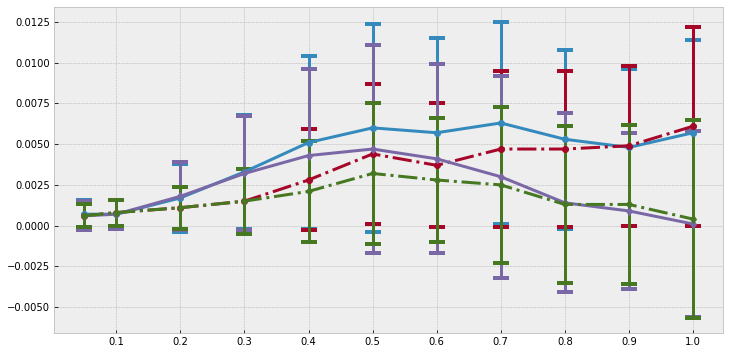

In [162]:
plt.figure(figsize=(12, 6))

plt.xticks(np.arange(0, 1.1, 0.1))

plt.errorbar(
    coverage_disparity.keys(),
    [x['aps'][0] for x in coverage_disparity.values()],
    yerr=[x['aps'][1] for x in coverage_disparity.values()],
    marker='o',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    coverage_disparity.keys(),
    [x['gaps'][0] for x in coverage_disparity.values()],
    yerr=[x['gaps'][1] for x in coverage_disparity.values()],
    marker='o',
    ls='-.',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    coverage_disparity.keys(),
    [x['raps'][0] for x in coverage_disparity.values()],
    yerr=[x['aps'][1] for x in coverage_disparity.values()],
    marker='d',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    coverage_disparity.keys(),
    [x['graps'][0] for x in coverage_disparity.values()],
    yerr=[x['gaps'][1] for x in coverage_disparity.values()],
    marker='d',
    ls='-.',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.show()

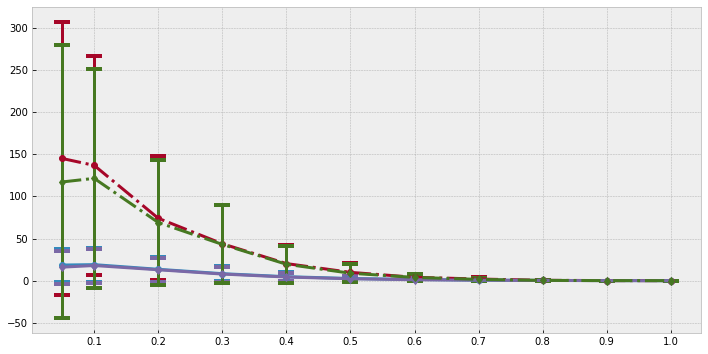

In [163]:
plt.figure(figsize=(12, 6))

plt.xticks(np.arange(0, 1.1, 0.1))

plt.errorbar(
    cardinality_disparity.keys(),
    [x['aps'][0] for x in cardinality_disparity.values()],
    yerr=[x['aps'][1] for x in cardinality_disparity.values()],
    marker='o',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    cardinality_disparity.keys(),
    [x['gaps'][0] for x in cardinality_disparity.values()],
    yerr=[x['gaps'][1] for x in cardinality_disparity.values()],
    marker='o',
    ls='-.',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    cardinality_disparity.keys(),
    [x['raps'][0] for x in cardinality_disparity.values()],
    yerr=[x['aps'][1] for x in cardinality_disparity.values()],
    marker='d',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.errorbar(
    cardinality_disparity.keys(),
    [x['graps'][0] for x in cardinality_disparity.values()],
    yerr=[x['gaps'][1] for x in cardinality_disparity.values()],
    marker='d',
    ls='-.',
    lw=3,
    capsize=8,
    capthick=4,
)
plt.show()

In [ ]:
fontsize = 24

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
plt.figure(figsize=(16, 8))
for i in range(len(A)):
    box = plt.boxplot(
#         df[df.subgroup == i].apply(lambda x: len(x['naive_0.25']), axis=1),
#         df[df.subgroup == i].apply(lambda x: len(x['aps_0.25']), axis=1),
#         df[df.subgroup == i].apply(lambda x: len(x['raps_0.25']), axis=1),
        df[df.subgroup == i].apply(lambda x: len(x['gaps_0.25']), axis=1),
        notch=True,
        positions=[i],
        widths=0.5,
    )
    set_box_color(box, f'C{i}')

subgroups = A
plt.title('confidence set size by subgroup', fontsize=fontsize)
plt.xticks(subgroups, fontsize=fontsize)
plt.xlabel('subgroups', fontsize=fontsize + 4)
# plt.yticks(range(0, 120, 10), fontsize=fontsize)
plt.ylabel('confidence set size', fontsize=fontsize + 4)
# plt.legend(subgroups, fontsize=fontsize, bbox_to_anchor=(1, 1.2), ncol=len(subgroups))
plt.show()

### Find difficult examples with conformal sets

In [ ]:
confidence_level = 0.1
min_count = 10
upper_quantile = 0.9
lower_quantile = 0.1

In [ ]:
skin_base = pathlib.Path('/Users/charles.lu/AAAI/data/skin/data/')

In [ ]:
naive_len = df[f'naive_{confidence_level}'].map(len)
aps_len = df[f'aps_{confidence_level}'].map(len)
raps_len = df[f'raps_{confidence_level}'].map(len)

In [ ]:
naive_upper_len = naive_len.quantile(upper_quantile)
naive_lower_len = naive_len.quantile(lower_quantile)

aps_upper_len = aps_len.quantile(upper_quantile)
aps_lower_len = aps_len.quantile(lower_quantile)

raps_upper_len = raps_len.quantile(upper_quantile)
raps_lower_len = raps_len.quantile(lower_quantile)

naive_hard = df[naive_len > naive_upper_len]
naive_easy = df[naive_len < naive_lower_len]

aps_hard = df[aps_len > aps_upper_len]
aps_easy = df[aps_len < aps_lower_len]

raps_hard = df[raps_len > raps_upper_len]
raps_easy = df[raps_len < raps_lower_len]

In [ ]:
# i = 0
# row = hard[hard.label == 31].iloc[i]
# print(label_map[row.label], row.label, row[f'aps_{confidence_level}'], row[f'naive_{confidence_level}'], sep='\n')
# PIL.Image.open(skin_base / row.image)

In [ ]:
naive_easy_cases = {}
for i, (label, count) in enumerate(naive_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        naive_easy_cases[(label_map[label], label)] = count

naive_hard_cases = {}
for i, (label, count) in enumerate(naive_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        naive_hard_cases[(label_map[label], label)] = count
    
aps_easy_cases = {}
for i, (label, count) in enumerate(aps_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        aps_easy_cases[(label_map[label], label)] = count

aps_hard_cases = {}
for i, (label, count) in enumerate(aps_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        aps_hard_cases[(label_map[label], label)] = count
    
raps_easy_cases = {}
for i, (label, count) in enumerate(raps_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        raps_easy_cases[(label_map[label], label)] = count

raps_hard_cases = {}
for i, (label, count) in enumerate(raps_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        raps_hard_cases[(label_map[label], label)] = count

In [ ]:
print('Easy overlap')
print('naive & aps\t', len(set(naive_easy_cases.keys()) & set(aps_easy_cases.keys())))
print('aps & raps\t', len(set(aps_easy_cases.keys()) & set(raps_easy_cases.keys())))
print('naive & raps\t', len(set(naive_easy_cases.keys()) & set(raps_easy_cases.keys())))
print('\nHard overlap')
print('naive & aps\t', len(set(naive_hard_cases.keys()) & set(aps_hard_cases.keys())))
print('aps & raps\t', len(set(aps_hard_cases.keys()) & set(raps_hard_cases.keys())))
print('naive & raps\t', len(set(naive_hard_cases.keys()) & set(raps_hard_cases.keys())))

In [ ]:
plt.bar(*zip(*sorted(naive_easy.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(aps_easy.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(raps_easy.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(naive_hard.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(aps_hard.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(raps_hard.subgroup.value_counts().to_dict().items())))

### Find difficult examples with epistemic uncertainty

In [ ]:
# turn logits into scorres
for k, df in test_dfs.items():
    res = []
    preds = [f'pred_{i}' for i in range(C)]
    for i, row in df[preds].iterrows():
        res.append(torch.softmax(torch.tensor([row[p] for p in preds]), axis=0).numpy())
    df['mc_scores'] = res

In [ ]:
for k, df in test_dfs.items():
    df['msp'] = df.mc_scores.apply(lambda x: 1 - x[:, 0].max())
    df['variance'] = df.mc_scores.apply(lambda x: np.mean(np.var(x, 1)))
    df['entropy'] = df.mc_scores.apply(lambda x: -np.mean(np.mean(x, 1) * np.log(np.mean(x, 1))))

In [ ]:
msp_easy = df[df.msp < df.msp.quantile(lower_quantile)]
msp_hard = df[df.msp > df.msp.quantile(upper_quantile)]

variance_easy = df[df.variance < df.variance.quantile(lower_quantile)]
variance_hard = df[df.variance > df.variance.quantile(upper_quantile)]

entropy_easy = df[df.entropy < df.entropy.quantile(lower_quantile)]
entropy_hard = df[df.entropy > df.entropy.quantile(upper_quantile)]

In [ ]:
msp_easy_cases = {}
for i, (label, count) in enumerate(msp_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        msp_easy_cases[(label_map[label], label)] = count

msp_hard_cases = {}
for i, (label, count) in enumerate(msp_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        msp_hard_cases[(label_map[label], label)] = count
    
variance_easy_cases = {}
for i, (label, count) in enumerate(variance_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        variance_easy_cases[(label_map[label], label)] = count

variance_hard_cases = {}
for i, (label, count) in enumerate(variance_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        variance_hard_cases[(label_map[label], label)] = count
    
entropy_easy_cases = {}
for i, (label, count) in enumerate(entropy_easy.label.value_counts().to_dict().items()):
    if count >= min_count:
        entropy_easy_cases[(label_map[label], label)] = count

entropy_hard_cases = {}
for i, (label, count) in enumerate(entropy_hard.label.value_counts().to_dict().items()):
    if count >= min_count:
        entropy_hard_cases[(label_map[label], label)] = count

In [ ]:
aps_hard.shape, raps_hard.shape

In [ ]:
variance_hard.shape, entropy_hard.shape

In [ ]:
print('\nEasy overlap: naive')
print('naive & msp\t', len(set(naive_easy_cases.keys()) & set(msp_easy_cases.keys())))
print('naive & var\t', len(set(naive_easy_cases.keys()) & set(variance_easy_cases.keys())))
print('naive & ent\t', len(set(naive_easy_cases.keys()) & set(entropy_easy_cases.keys())))

print('\nEasy overlap: aps')
print('aps & msp\t', len(set(aps_easy_cases.keys()) & set(msp_easy_cases.keys())))
print('aps & var\t', len(set(aps_easy_cases.keys()) & set(variance_easy_cases.keys())))
print('aps & ent\t', len(set(aps_easy_cases.keys()) & set(entropy_easy_cases.keys())))

print('\nEasy overlap: raps')
print('raps & msp\t', len(set(raps_easy_cases.keys()) & set(msp_easy_cases.keys())))
print('raps & var\t', len(set(raps_easy_cases.keys()) & set(variance_easy_cases.keys())))
print('raps & ent\t', len(set(raps_easy_cases.keys()) & set(entropy_easy_cases.keys())))

print('\nhard overlap: naive')
print('naive & msp\t', len(set(naive_hard_cases.keys()) & set(msp_hard_cases.keys())))
print('naive & var\t', len(set(naive_hard_cases.keys()) & set(variance_hard_cases.keys())))
print('naive & ent\t', len(set(naive_hard_cases.keys()) & set(entropy_hard_cases.keys())))

print('\nhard overlap: aps')
print('aps & msp\t', len(set(aps_hard_cases.keys()) & set(msp_hard_cases.keys())))
print('aps & var\t', len(set(aps_hard_cases.keys()) & set(variance_hard_cases.keys())))
print('aps & ent\t', len(set(aps_hard_cases.keys()) & set(entropy_hard_cases.keys())))

print('\nhard overlap: raps')
print('raps & msp\t', len(set(raps_hard_cases.keys()) & set(msp_hard_cases.keys())))
print('raps & var\t', len(set(raps_hard_cases.keys()) & set(variance_hard_cases.keys())))
print('raps & ent\t', len(set(raps_hard_cases.keys()) & set(entropy_hard_cases.keys())))

In [ ]:
plt.bar(*zip(*sorted(variance_easy.subgroup.value_counts().to_dict().items())))

In [ ]:
plt.bar(*zip(*sorted(variance_hard.subgroup.value_counts().to_dict().items())))

In [ ]:
# sub_df = df[df.subgroup == 4]
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
# conf = 'naive_0.1'
# conf = 'aps_0.1'
# conf = 'raps_0.1'
conf = 'gaps_0.1'
lw=4
ls='-'
fontsize=24

x = df[conf].map(len)
y = df.msp.values
jitter = np.random.uniform(low=-0.25, high=0.25, size=x.shape)
ax[0].scatter(x + jitter, y, alpha=0.1)
ax[0].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='C1', lw=lw, ls=ls)
ax[0].set_xlabel('Prediction set size', fontsize=fontsize)
ax[0].set_ylabel('Softmax', fontsize=fontsize)

x = df[conf].map(len)
y = df.variance.values
jitter = np.random.uniform(low=-0.25, high=0.25, size=x.shape)
ax[1].scatter(x + jitter, y, alpha=0.1)
ax[1].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='C1', lw=lw, ls=ls)
ax[1].set_xlabel('Prediction set size', fontsize=fontsize)
ax[1].set_ylabel('Variance', fontsize=fontsize)

x = df[conf].map(len)
y = df.entropy.values
jitter = np.random.uniform(low=-0.25, high=0.25, size=x.shape)
ax[2].scatter(x + jitter, y, alpha=0.1)
ax[2].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), c='C1', lw=lw, ls=ls)
ax[2].set_xlabel('Prediction set size', fontsize=fontsize)
ax[2].set_ylabel('Entropy', fontsize=fontsize)
plt.tight_layout()
# plt.savefig('/Users/charles.lu/AAAI/figures/fitz-correlation.png')

In [ ]:
# sub_df = df[df.subgroup == 4]
fig, ax = plt.subplots(ncols=3, figsize=(16, 5))
# conf = 'naive_0.1'
# conf = 'aps_0.1'
# conf = 'raps_0.1'
# conf = 'gaps_0.2'
conf = 'gaps_0.2'
lw=5
ls='-'
fontsize=24

label_map = dict(sorted(zip(fitz_df.label.unique(), itertools.count())))
malignant =[label_map[x] for x in fitz_df[fitz_df.three_partition_label == 'malignant'].label.unique()]
pos_df = df[df.label.isin(malignant)].sample(n=500)
neg_df = df[~df.label.isin(malignant)].sample(n=500)

x_pos = pos_df[conf].map(len)
y_pos = pos_df.msp.values
x_neg = neg_df[conf].map(len)
y_neg = neg_df.msp.values
jitter_pos = np.random.uniform(low=-0.05, high=0.05, size=x_pos.shape)
jitter_neg = np.random.uniform(low=-0.05, high=0.05, size=x_neg.shape)
ax[0].scatter(x_pos + jitter_pos, y_pos, alpha=0.3, c='C1', marker='x')
ax[0].scatter(x_neg + jitter_neg, y_neg, alpha=0.3, c='C0', marker='o')
ax[0].plot(np.unique(x_pos), np.poly1d(np.polyfit(x_pos, y_pos, 1))(np.unique(x_pos)), c='C1', lw=lw, ls=ls)
ax[0].plot(np.unique(x_neg), np.poly1d(np.polyfit(x_neg, y_neg, 1))(np.unique(x_neg)), c='C0', lw=lw, ls=ls)
ax[0].set_xlabel('Prediction set size', fontsize=fontsize)
ax[0].set_ylabel('Softmax ', fontsize=fontsize)

x_pos = pos_df[conf].map(len)
y_pos = pos_df.variance.values
x_neg = neg_df[conf].map(len)
y_neg = neg_df.variance.values
jitter_pos = np.random.uniform(low=-0.05, high=0.05, size=x_pos.shape)
jitter_neg = np.random.uniform(low=-0.05, high=0.05, size=x_neg.shape)
ax[1].scatter(x_pos + jitter_pos, y_pos, alpha=0.3, c='C1', marker='x')
ax[1].scatter(x_neg + jitter_neg, y_neg, alpha=0.3, c='C0', marker='o')
ax[1].plot(np.unique(x_pos), np.poly1d(np.polyfit(x_pos, y_pos, 1))(np.unique(x_pos)), c='C1', lw=lw, ls=ls)
ax[1].plot(np.unique(x_neg), np.poly1d(np.polyfit(x_neg, y_neg, 1))(np.unique(x_neg)), c='C0', lw=lw, ls=ls)
ax[1].set_xlabel('Prediction set size', fontsize=fontsize)
ax[1].set_ylabel('Variance', fontsize=fontsize)

x_pos = pos_df[conf].map(len)
y_pos = pos_df.entropy.values
x_neg = neg_df[conf].map(len)
y_neg = neg_df.entropy.values
jitter_pos = np.random.uniform(low=-0.05, high=0.05, size=x_pos.shape)
jitter_neg = np.random.uniform(low=-0.05, high=0.05, size=x_neg.shape)
ax[2].scatter(x_pos + jitter_pos, y_pos, alpha=0.3, c='C1', marker='x')
ax[2].scatter(x_neg + jitter_neg, y_neg, alpha=0.3, c='C0', marker='o')
ax[2].plot(np.unique(x_pos), np.poly1d(np.polyfit(x_pos, y_pos, 1))(np.unique(x_pos)), c='C1', lw=lw, ls=ls)
ax[2].plot(np.unique(x_neg), np.poly1d(np.polyfit(x_neg, y_neg, 1))(np.unique(x_neg)), c='C0', lw=lw, ls=ls)
ax[2].set_xlabel('Prediction set size', fontsize=fontsize)
ax[2].set_ylabel('Entropy', fontsize=fontsize)
plt.tight_layout()
# plt.savefig('/Users/charles.lu/AAAI/figures/fitz-correlation.png')

In [ ]:
class_dict_114 = {'acanthosis nigricans': 0, 'acne': 1, 'acne vulgaris': 2, 'acquired autoimmune bullous diseaseherpes gestationis': 3, 'acrodermatitis enteropathica': 4, 'actinic keratosis': 5, 'allergic contact dermatitis': 6, 'aplasia cutis': 7, 'basal cell carcinoma': 8, 'basal cell carcinoma morpheiform': 9, 'becker nevus': 10, 'behcets disease': 11, 'calcinosis cutis': 12, 'cheilitis': 13, 'congenital nevus': 14, 'dariers disease': 15, 'dermatofibroma': 16, 'dermatomyositis': 17, 'disseminated actinic porokeratosis': 18, 'drug eruption': 19, 'drug induced pigmentary changes': 20, 'dyshidrotic eczema': 21, 'eczema': 22, 'ehlers danlos syndrome': 23, 'epidermal nevus': 24, 'epidermolysis bullosa': 25, 'erythema annulare centrifigum': 26, 'erythema elevatum diutinum': 27, 'erythema multiforme': 28, 'erythema nodosum': 29, 'factitial dermatitis': 30, 'fixed eruptions': 31, 'folliculitis': 32, 'fordyce spots': 33, 'granuloma annulare': 34, 'granuloma pyogenic': 35, 'hailey hailey disease': 36, 'halo nevus': 37, 'hidradenitis': 38, 'ichthyosis vulgaris': 39, 'incontinentia pigmenti': 40, 'juvenile xanthogranuloma': 41, 'kaposi sarcoma': 42, 'keloid': 43, 'keratosis pilaris': 44, 'langerhans cell histiocytosis': 45, 'lentigo maligna': 46, 'lichen amyloidosis': 47, 'lichen planus': 48, 'lichen simplex': 49, 'livedo reticularis': 50, 'lupus erythematosus': 51, 'lupus subacute': 52, 'lyme disease': 53, 'lymphangioma': 54, 'malignant melanoma': 55, 'melanoma': 56, 'milia': 57, 'mucinosis': 58, 'mucous cyst': 59, 'mycosis fungoides': 60, 'myiasis': 61, 'naevus comedonicus': 62, 'necrobiosis lipoidica': 63, 'nematode infection': 64, 'neurodermatitis': 65, 'neurofibromatosis': 66, 'neurotic excoriations': 67, 'neutrophilic dermatoses': 68, 'nevocytic nevus': 69, 'nevus sebaceous of jadassohn': 70, 'papilomatosis confluentes and reticulate': 71, 'paronychia': 72, 'pediculosis lids': 73, 'perioral dermatitis': 74, 'photodermatoses': 75, 'pilar cyst': 76, 'pilomatricoma': 77, 'pityriasis lichenoides chronica': 78, 'pityriasis rosea': 79, 'pityriasis rubra pilaris': 80, 'porokeratosis actinic': 81, 'porokeratosis of mibelli': 82, 'porphyria': 83, 'port wine stain': 84, 'prurigo nodularis': 85, 'psoriasis': 86, 'pustular psoriasis': 87, 'pyogenic granuloma': 88, 'rhinophyma': 89, 'rosacea': 90, 'sarcoidosis': 91, 'scabies': 92, 'scleroderma': 93, 'scleromyxedema': 94, 'seborrheic dermatitis': 95, 'seborrheic keratosis': 96, 'solid cystic basal cell carcinoma': 97, 'squamous cell carcinoma': 98, 'stasis edema': 99, 'stevens johnson syndrome': 100, 'striae': 101, 'sun damaged skin': 102, 'superficial spreading melanoma ssm': 103, 'syringoma': 104, 'telangiectases': 105, 'tick bite': 106, 'tuberous sclerosis': 107, 'tungiasis': 108, 'urticaria': 109, 'urticaria pigmentosa': 110, 'vitiligo': 111, 'xanthomas': 112, 'xeroderma pigmentosum': 113}
class_dict_9 = {'benign dermal': 0, 'benign epidermal': 1, 'benign melanocyte': 2, 'genodermatoses': 3, 'inflammatory': 4, 'malignant cutaneous lymphoma': 5, 'malignant dermal': 6, 'malignant epidermal': 7, 'malignant melanoma': 8}
group_dict = {-1: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [ ]:

def dict_to_df(test_res):
    n_it = 30
    mc_col_lst = [f"mc_{i}" for i in range(n_it)]
    df = pd.DataFrame(columns=['image', 'label', 'subgroup', 'mc'])
    for row_idx, k in enumerate(test_res.keys()):
        df.loc[row_idx, 'image'] = k
        df.loc[row_idx, 'label'] = test_res[k]['meta']['label']
        df.loc[row_idx, 'subgroup'] = test_res[k]['meta']['subgroup']
        df.loc[row_idx, 'mc'] = [test_res[k][f'mc_{it}'][0] for it in range(n_it)]

    return df

raw_df_114_lst = []
for seed in range(5):
    res = json.load(open(os.path.join('/Users/charles.lu/AAAI/fitz/fitz/', f"seed_{seed}/test-res.json"), 'r'))
    raw_df_114_lst.append(dict_to_df(res))

In [ ]:
from scipy.special import softmax

def bc(pred):
    m, n = np.argsort(np.mean(pred, axis=0))[-2:]
    h1 = np.histogram(pred[:, m])[0]
    h2 = np.histogram(pred[:, n])[0]
    return sum([np.sqrt(h_i * h_j) for h_i, h_j in zip(h1, h2)]) / 100

def get_posterior(row):
    mc = np.array(row.mc)
    pred_mean = mc.mean(0)
    msp = 1 - pred_mean.max()
    pred_var = np.mean(np.var(mc, axis=0))
    pred_max = np.max(pred_mean)
    entropy = -np.mean(pred_mean * np.log(pred_mean))
    return {
        'image': row.image,
        'subgroup': row.subgroup,
        'label': row.label,
        'pred_max': pred_max,
        'pred': pred_mean.argmax(),
        'pred_mean': pred_mean,
        'pred_var': pred_var,
        'entropy': entropy,
        'bc': bc(mc),
        'msp': msp
    }
# Conformal code
def get_q_hat(calibration_scores, labels, alpha=0.05):
    if not isinstance(calibration_scores, torch.Tensor):
        calibration_scores = torch.tensor(calibration_scores)
        
    n = calibration_scores.shape[0]
    
    #  sort scores and returns values and index that would sort classes
    values, indices = calibration_scores.sort(dim=1, descending=True)
    
    #  sum up all scores cummulatively and return to original index order 
    cum_scores = values.cumsum(1).gather(1, indices.argsort(1))[range(n), labels]
    
    #  get quantile with small correction for finite sample sizes
    q_hat = torch.quantile(cum_scores, np.ceil((n + 1) * (1 - alpha)) / n)
    
    return q_hat


def conformal_inference(scores, q_hat):
    if not isinstance(scores, torch.Tensor):
        scores = torch.tensor(scores)
    assert q_hat < 1, 'q_hat must be below 1'
        
    n = scores.shape[0]
    
    values, indices = scores.sort(dim=1, descending=True)
    
    #  number of each confidence prediction set to acheive coverage
    set_sizes = (values.cumsum(1) > q_hat).int().argmax(dim=1)
    confidence_sets = [indices[i][0:(set_sizes[i] + 1)] for i in range(n)]
    
    return [x.tolist() for x in confidence_sets]

def raps_calibrate(
        scores,
        labels, 
        index, 
        ordered, 
        cumsum, 
        penalty, 
        randomized, 
        allow_zero_sets,
        alpha=0.05,
    ):
    def get_p_value(
            score, 
            label, 
            index, 
            ordered, 
            cumsum, 
            penalty, 
            randomized, 
            allow_zero_sets
        ):
        idx = np.where(index == label)
        tau = cumsum[idx]

        if not randomized:
            return tau + penalty[0]

        e = np.random.random()
        if idx == (0, 0):
            return penalty[0] + (e * tau if allow_zero_sets else tau)
        else:
            p = penalty[0:(idx[1][0] + 1)].sum()
            return p + cumsum[(idx[0], idx[1] - 1)] + (e * ordered[idx])

    mask = -np.ones(scores.shape[0])
    for i in range(mask.shape[0]):
        mask[i] = get_p_value(
        scores[i,:],
        labels[i].item(),
        index[None, i,:],
        ordered[None, i,:],
        cumsum[None, i,:],
        penalty[0, :],
        randomized=True,
        allow_zero_sets=False
    )

    qhat = np.quantile(mask, 1 - alpha, interpolation='higher')
    return qhat


# Generalized conditional quantile function.
def raps_predict(
        scores, 
        tau, 
        index, 
        ordered, 
        cumsum, 
        penalty, 
        randomized=True, 
        allow_zero_sets=True,
    ):
    penalty_cumsum = np.cumsum(penalty, axis=1)
    sizes_base = ((cumsum + penalty_cumsum) <= tau).sum(axis=1) + 1  # 1 - 1001
    sizes_base = np.minimum(sizes_base, scores.shape[1]) # 1-1000

    if randomized:
        V = np.zeros(sizes_base.shape)
        for i in range(sizes_base.shape[0]):
            # -1 since sizes_base \in {1,...,1000}.
            j = sizes_base[i] - 1
            cumsum_ij = cumsum[i, j]
            ordered_ij = ordered[i, j]
            p = penalty_cumsum[0, j]
            V[i] = 1 / ordered[i, j] * tau - (cumsum_ij - ordered_ij) - p

        sizes = sizes_base - (np.random.random(V.shape) >= V).astype(int)
    else:
        sizes = sizes_base

    if tau == 1.0:
        sizes[:] = cumsum.shape[1] 
        # always predict max size if alpha==0. (Avoids numerical error.)

    if not allow_zero_sets:
        sizes[sizes == 0] = 1 
        # allow the user the option to never have empty sets (will lead to incorrect coverage if 1-alpha < model's top-1 accuracy

    return [index[i, 0:sizes[i]] for i in range(index.shape[0])]

def compute_aps(raw_df_lst):
    df_lst = []
    for idx, df in enumerate(raw_df_lst):
        df_1 = pd.DataFrame.from_dict(df.apply(get_posterior, axis=1).to_dict(), orient='index')

        # Isolate 10% of test set for conformal set
        conformal_set = df_1.sample(n=int(0.25 * len(df_1)), random_state=0)
        test_set = df_1[~df_1.isin(conformal_set)].dropna()
        calibration_scores = np.array([i for i in conformal_set['pred_mean']])
        labels = np.array(conformal_set['label'])
        for alpha in [0.05, 0.10, 0.20, 0.30]:
            # Compute q_hat and compute conformal sets
            q = get_q_hat(calibration_scores, labels=labels, alpha=alpha)
            test_set[f'conformal_set_{alpha:1.2f}'] = conformal_inference(np.array([i for i in test_set['pred_mean']]), q)
            test_set[f'set_size_alpha_{alpha:1.2f}'] = [len(s) for s in test_set[f'conformal_set_{alpha:1.2f}']]

        df_lst.append(test_set)
    return df_lst
    
    
def compute_aps_by_subgroup(raw_df_lst):
    df_lst = []
    for idx, df in enumerate(raw_df_lst):
        df_1 = pd.DataFrame.from_dict(df.apply(get_posterior, axis=1).to_dict(), orient='index')

        # Isolate 10% of test set for conformal set
        conformal_set = df_1.sample(n=int(0.25 * len(df_1)), random_state=0)
        test_set = df_1[~df_1.isin(conformal_set)].dropna()
        
        subgroup_df = []
        for s in group_dict.values():
            subgroup_cs = conformal_set[conformal_set.subgroup == s].copy()
            subgroup_ts = test_set[test_set.subgroup == s].copy()
            
            calibration_scores = np.array([i for i in subgroup_cs['pred_mean']])
            labels = np.array(subgroup_cs['label'])
            for alpha in [0.05, 0.10, 0.20, 0.30]:
                # Compute q_hat and compute conformal sets
                q = get_q_hat(calibration_scores, labels=labels, alpha=alpha)
                subgroup_ts[f'conformal_set_{alpha:1.2f}'] = conformal_inference(np.array([i for i in subgroup_ts['pred_mean']]), q)
                subgroup_ts[f'set_size_alpha_{alpha:1.2f}'] = [len(s) for s in subgroup_ts[f'conformal_set_{alpha:1.2f}']]

            subgroup_df.append(subgroup_ts)
        df_lst.append(pd.concat(subgroup_df))
    return df_lst
    
def sort_sum(scores):
    index = scores.argsort(axis=1)[:, ::-1]
    ordered = np.sort(scores, axis=1)[:, ::-1]
    cumsum = np.cumsum(ordered, axis=1) 
    return index, ordered, cumsum


def compute_raps(raw_df_lst, kreg, l):
   
    df_lst = []
    for idx, df in enumerate(raw_df_lst):
        df_1 = pd.DataFrame.from_dict(df.apply(get_posterior, axis=1).to_dict(), orient='index')

        # Isolate 10% of test set for conformal set
        conformal_set = df_1.sample(n=int(0.25 * len(df_1)), random_state=0)
        test_set = df_1[~df_1.isin(conformal_set)].dropna()
        
        num_class = conformal_set.pred_mean.values[0].shape[0]
        calib_labels = conformal_set.label.values
        logits = torch.tensor([x for x in conformal_set.pred_mean.values])
        calib_scores = logits.numpy()

        penalty = np.zeros((1, num_class))
        penalty[:, kreg:] += l
        
        calib_index, calib_ordered, calib_cumsum = sort_sum(calib_scores)
        
        for alpha in [0.05, 0.10, 0.20, 0.30]:
            # Compute q_hat and compute conformal sets
            q = raps_calibrate(
                    calib_scores, 
                    calib_labels, 
                    calib_index, 
                    calib_ordered, 
                    calib_cumsum, 
                    penalty, 
                    True, 
                    True,
                    alpha=alpha,
                )
            test_pred = np.array([i for i in test_set['pred_mean']])
            test_index, test_ordered, test_cumsum = sort_sum(test_pred)
            test_set[f'conformal_set_{alpha:1.2f}'] = raps_predict(test_pred, q, test_index, test_ordered, 
                                                                   test_cumsum, penalty, True, True)
            test_set[f'set_size_alpha_{alpha:1.2f}'] = [len(s) for s in test_set[f'conformal_set_{alpha:1.2f}']]
 
        df_lst.append(test_set)
    return df_lst

def compute_raps_by_subgroup(raw_df_lst, kreg, l):
    df_lst = []
    for idx, df in enumerate(raw_df_lst):
        df_1 = pd.DataFrame.from_dict(df.apply(get_posterior, axis=1).to_dict(), orient='index')

        # Isolate 10% of test set for conformal set
        conformal_set = df_1.sample(n=int(0.25 * len(df_1)), random_state=0)
        test_set = df_1[~df_1.isin(conformal_set)].dropna()
        subgroup_df = []
        for s in group_dict.values():
            subgroup_cs = conformal_set[conformal_set.subgroup == s].copy()
            subgroup_ts = test_set[test_set.subgroup == s].copy()
            num_class = subgroup_cs.pred_mean.values[0].shape[0]
            calib_labels = subgroup_cs.label.values
            logits = torch.tensor([x for x in subgroup_cs.pred_mean.values])
            calib_scores = logits.numpy()

            penalty = np.zeros((1, num_class))
            penalty[:, kreg:] += l

            calib_index, calib_ordered, calib_cumsum = sort_sum(calib_scores)

            for alpha in np.arange(0.05, 0.99, 0.05):
                # Compute q_hat and compute conformal sets
                q = raps_calibrate(
                        calib_scores, 
                        calib_labels, 
                        calib_index, 
                        calib_ordered, 
                        calib_cumsum, 
                        penalty, 
                        True, 
                        True,
                        alpha=alpha,
                    )
                test_pred = np.array([i for i in subgroup_ts['pred_mean']])
                test_index, test_ordered, test_cumsum = sort_sum(test_pred)
                subgroup_ts[f'conformal_set_{alpha:1.2f}'] = raps_predict(test_pred, q, test_index, test_ordered, 
                                                                       test_cumsum, penalty, True, True)
                subgroup_ts[f'set_size_alpha_{alpha:1.2f}'] = [len(s) for s in subgroup_ts[f'conformal_set_{alpha:1.2f}']]
            subgroup_df.append(subgroup_ts)
        df_lst.append(pd.concat(subgroup_df))
    return df_lst
    

In [ ]:
np.array(raw_df_114_lst[0].mc.values[0]).shape

In [ ]:
kreg = 14
l = 1e-4

df_aps = compute_aps(raw_df_114_lst)
df_raps = compute_raps(raw_df_114_lst, kreg, l)
df_ours = compute_raps_by_subgroup(raw_df_114_lst, kreg, l)

In [ ]:
def get_prop_in_conformal(df, alpha):
    true = df.label
    pred = df[f'conformal_set_{alpha:1.2f}']
    corr = 0
    for t, p in zip(true, pred):
        corr += 1 if t in p else 0
    return corr / len(true)

def get_rule_out_prop(df, malignant_ids, alpha):
    true = df.label
    pred = df[f'conformal_set_{alpha:1.2f}']
    rule_out = []
    for m_id in malignant_ids:
        corr = 0
        for t, p in zip(true, pred):
            if m_id not in p and m_id != t:
                corr += 1
        rule_out.append(corr / len(true))
    return np.array(rule_out).mean()

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(15, 5)
m = 10
for alpha in [0.01, 0.05, 0.1, 0.2, 0.3]:
    rule_out = []
    rule_in = []
    set_size = []
    s_mean = []
    for df_lst, name in zip([df_aps, df_raps, df_ours], ['aps', 'raps', 'gaps']):
        for i in range(5):
            df = df_lst[i]
            rule_out.append(get_rule_out_prop(df, malignant_class_ids, alpha))
            set_size.append(df[f'set_size_alpha_{alpha:1.2f}'].mean())

            malignant_df = df[df.label.isin(malignant_class_ids)]
            rule_in.append(get_prop_in_conformal(malignant_df, alpha))
            
    ax[0].errorbar(alpha, np.array(rule_in).mean(), yerr=np.array(rule_in).std(), fmt='^-', color='firebrick', markersize=m)
    ax[1].errorbar(alpha, np.array(rule_out).mean(), yerr=np.array(rule_out).std(), fmt='^-', color='firebrick', markersize=m)
    ax[2].errorbar(alpha, np.array(set_size).mean(), yerr=np.array(set_size).std(),fmt='^-', color='firebrick', markersize=m)

ax[0].set_xlabel("Alpha", fontsize=20)
ax[1].set_xlabel("Alpha", fontsize=20)
ax[2].set_xlabel("Alpha", fontsize=20)
ax[0].set_ylabel("Proportion of correct rule-in", fontsize=20)
ax[1].set_ylabel("Proportion of correct rule-out", fontsize=20)
ax[2].set_ylabel("Average set size", fontsize=20)
plt.tight_layout()
# fig.savefig("rule_in_out_fitzpatrick.png", bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 5)
m = 10
alpha=0.1
import seaborn as sns

rule_in_dict = {}
rule_out_dict = {}
path = "/Users/charles.lu/AAAI/data/skin/skin-info.csv"
df = pd.read_csv(path)

malignant_classes = df[df.three_partition_label.str.contains("malignant")].raw_label.unique()
malignant_class_ids = [class_dict_114[i] for i in malignant_classes]

for s in df_raps[0].subgroup.unique():
    rule_out = []
    rule_in = []
    set_size = []
    for i in range(5):
        df = df_raps[i]
        df = df[df.subgroup == s]
        rule_out.append(get_rule_out_prop(df, malignant_class_ids, alpha))
        set_size.append(df[f'set_size_alpha_{alpha:1.2f}'])

        malignant_df = df[df.label.isin(malignant_class_ids)]
        rule_in.append(get_prop_in_conformal(malignant_df, alpha))
    rule_in_dict[s] = rule_in
    rule_out_dict[s] = rule_out
    
fontsize = 20

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
for j, res in enumerate([rule_in_dict, rule_out_dict]):
    for i in range(7):
        box = ax[j].boxplot(
            res[i], 
            notch=False,
            positions=[i],
            widths=0.5,
        )
        set_box_color(box, f'C{i}')

    subgroups = list(range(7))
    ax[j].set_xlabel('Skin tone', fontsize=fontsize )
ax[0].set_ylabel('Proportion of correct rule-in', fontsize=fontsize)
ax[1].set_ylabel('Proportion of correct rule-out', fontsize=fontsize)

plt.tight_layout()
# fig.savefig("rule_in_out_disparity_skin.png", bbox_inches='tight')